In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from matplotlib import dates

pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"

# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [80]:
# 보기 옵션
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', 30)

In [81]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

In [82]:
df['year'] = df['reg_date'].dt.year
df['month'] = df['reg_date'].dt.month

# 데이터 분포

In [83]:
df['prd'].value_counts()

사과     729403
배추     694797
무      501140
양파     399625
배      295792
미나리    195936
쪽파     150364
마늘     125376
갓       74244
생강      56165
열무      49923
굴       45505
총각무     11405
Name: prd, dtype: int64

In [84]:
df.describe()

scale          price     new_class       price_kg          year  \
count 3329675.00000  3329675.00000 3329675.00000  3329675.00000 3329675.00000   
mean       28.91087    33596.67855       1.31244     2182.06906    2020.19385   
std       384.10446   293858.38732       1.04705    13961.70281       1.55833   
min         0.10000      500.00000       1.00000       14.29000    2017.00000   
25%         8.00000     6800.00000       1.00000      800.00000    2019.00000   
50%        10.00000    13300.00000       1.00000     1500.00000    2020.00000   
75%        15.00000    26000.00000       1.00000     2766.67000    2022.00000   
max     20000.00000 88005500.00000       9.00000 22001375.00000    2022.00000   

              month  
count 3329675.00000  
mean        7.22326  
std         3.32046  
min         1.00000  
25%         4.00000  
50%         8.00000  
75%        10.00000  
max        12.00000

In [85]:
# 이상치 제거
df = df.drop(df[(df['price_kg']>=2125300)].index)

# 품목별 가격 분포

11/1~11/15 -> 17 18 19 20 21 -> 절대적인 수 X -> 상대적인 등락율 사용
통계청 조사

## 갓

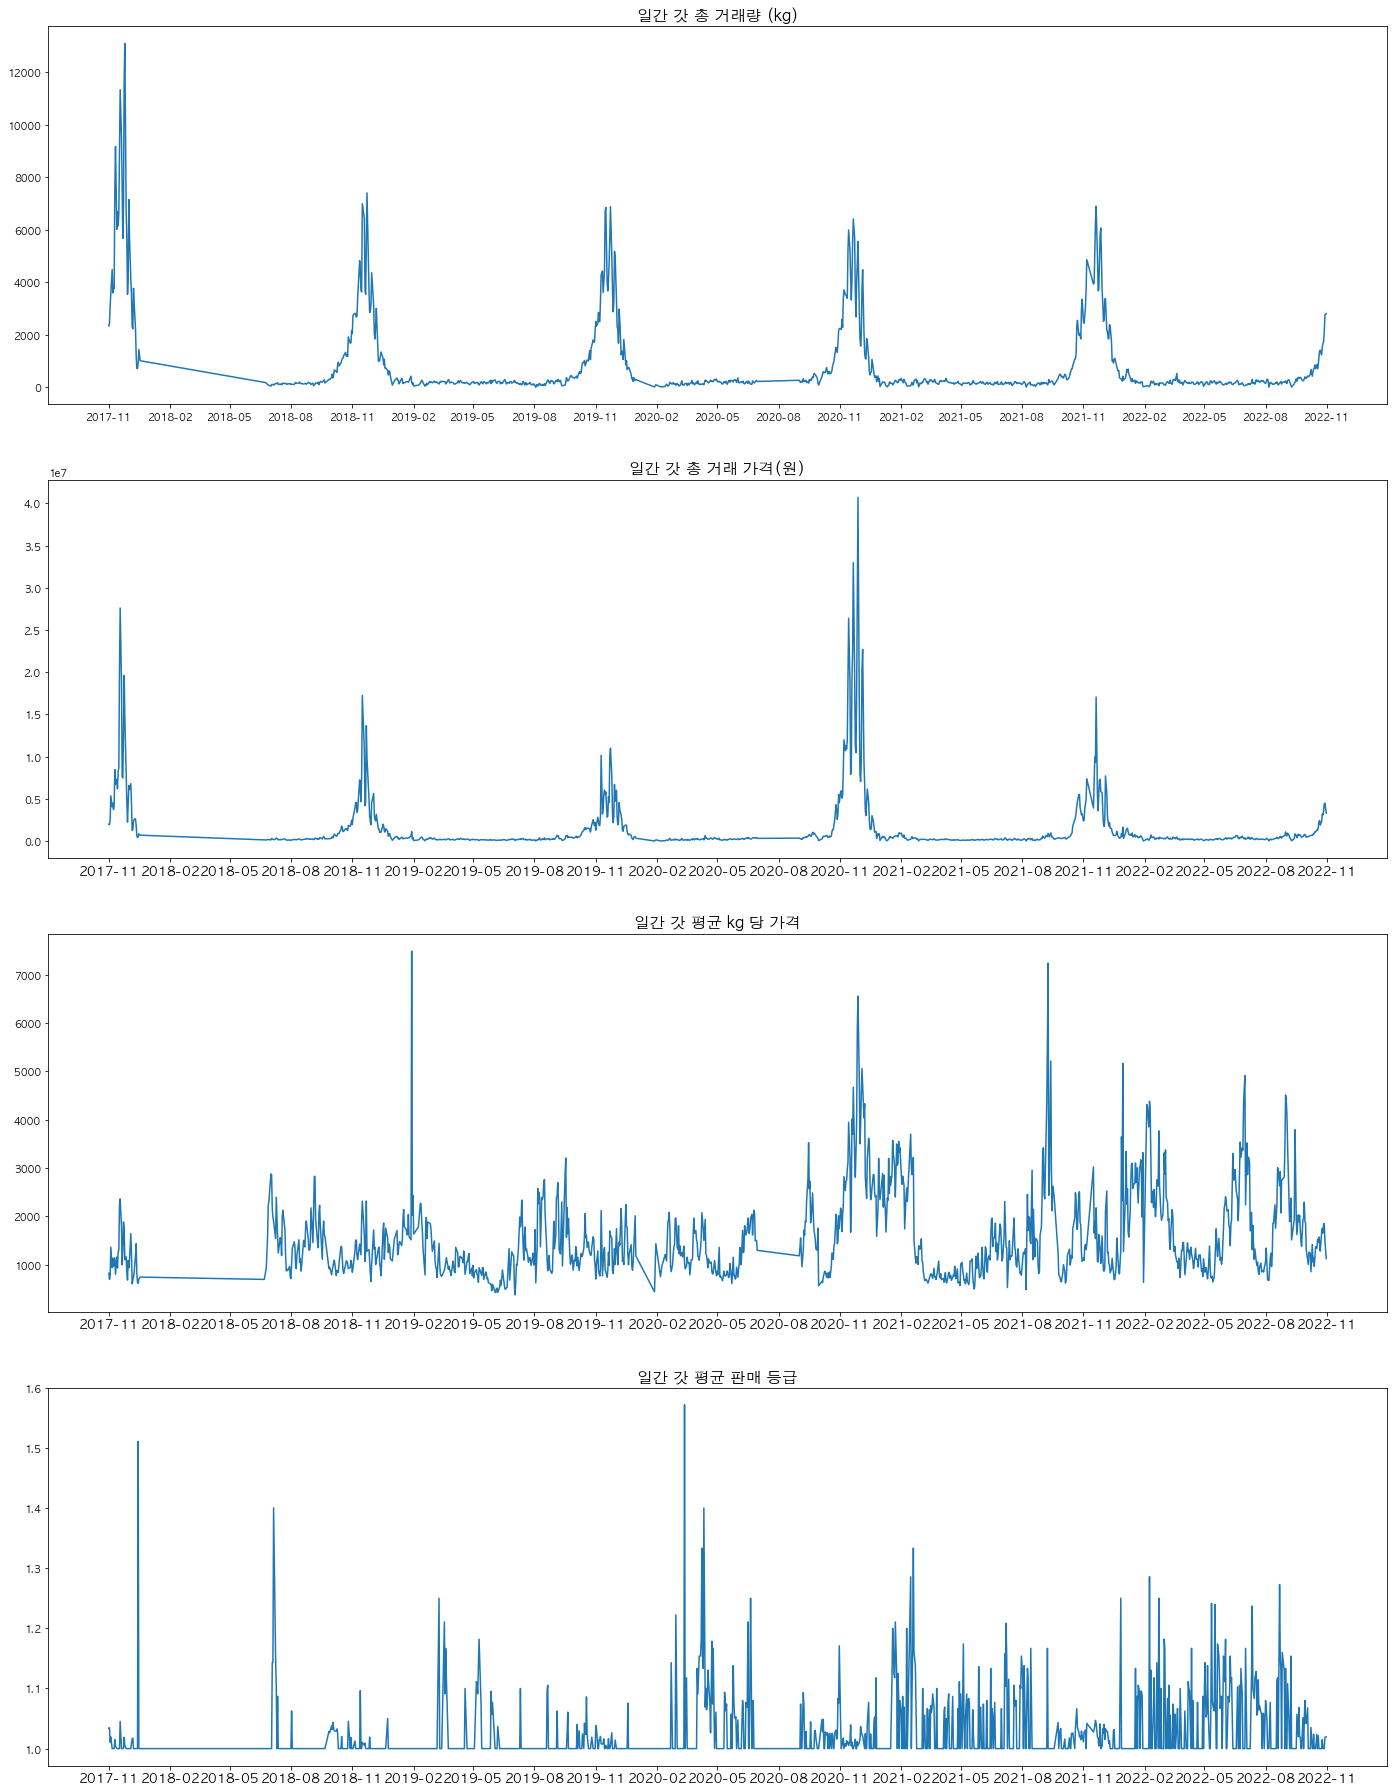

In [86]:
a = df.groupby(['prd','reg_date']).sum().reset_index()[['prd','reg_date','scale','price']]
b = df.groupby(['prd','reg_date']).mean().reset_index()[['prd','reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})
c


prd_lst = list(c['prd'].unique())
nums = [[9,12],[9,12],[3,5],[10,12],[3,12],[9,11],[11,12],[10,12],[8,11],[7,9],[7,9],[9,12],[10,12]]
cnt = 0

for prd in prd_lst:
    a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
    b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
    c = a.merge(b)
    c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

    plt.figure(figsize=(24,32),facecolor="white")
    plt.subplot(4,1,1)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래량 (kg) (제철: {nums[cnt][0]}~{nums[cnt][1]}월)')
    aaa = plt.plot(c[c['prd']==prd]['reg_date'],c[c['prd']==prd]['total_scale'])
    plt.fill_between(c[c['prd']==prd]['reg_date'],c[c['prd']==prd]['avg_price_kg'],where=(c[c['prd']==prd]['reg_date'].dt.month>=nums[cnt][0]) & (c[c['prd']==prd]['reg_date'].dt.month<=nums[cnt][1]))
    aaa = plt.plot(c['reg_date'],c['total_scale'])
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


    plt.subplot(4,1,2)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title('일간 '+prd+' 총 거래 가격(원)')
    aaa = plt.plot(c['reg_date'],c['total_price'])
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

    plt.subplot(4,1,3)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title('일간 '+prd+' 평균 kg 당 가격')
    aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

    plt.subplot(4,1,4)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title('일간 '+prd+' 평균 판매 등급')
    aaa = plt.plot(c['reg_date'],c['avg_class'])
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

    plt.show()

## 굴

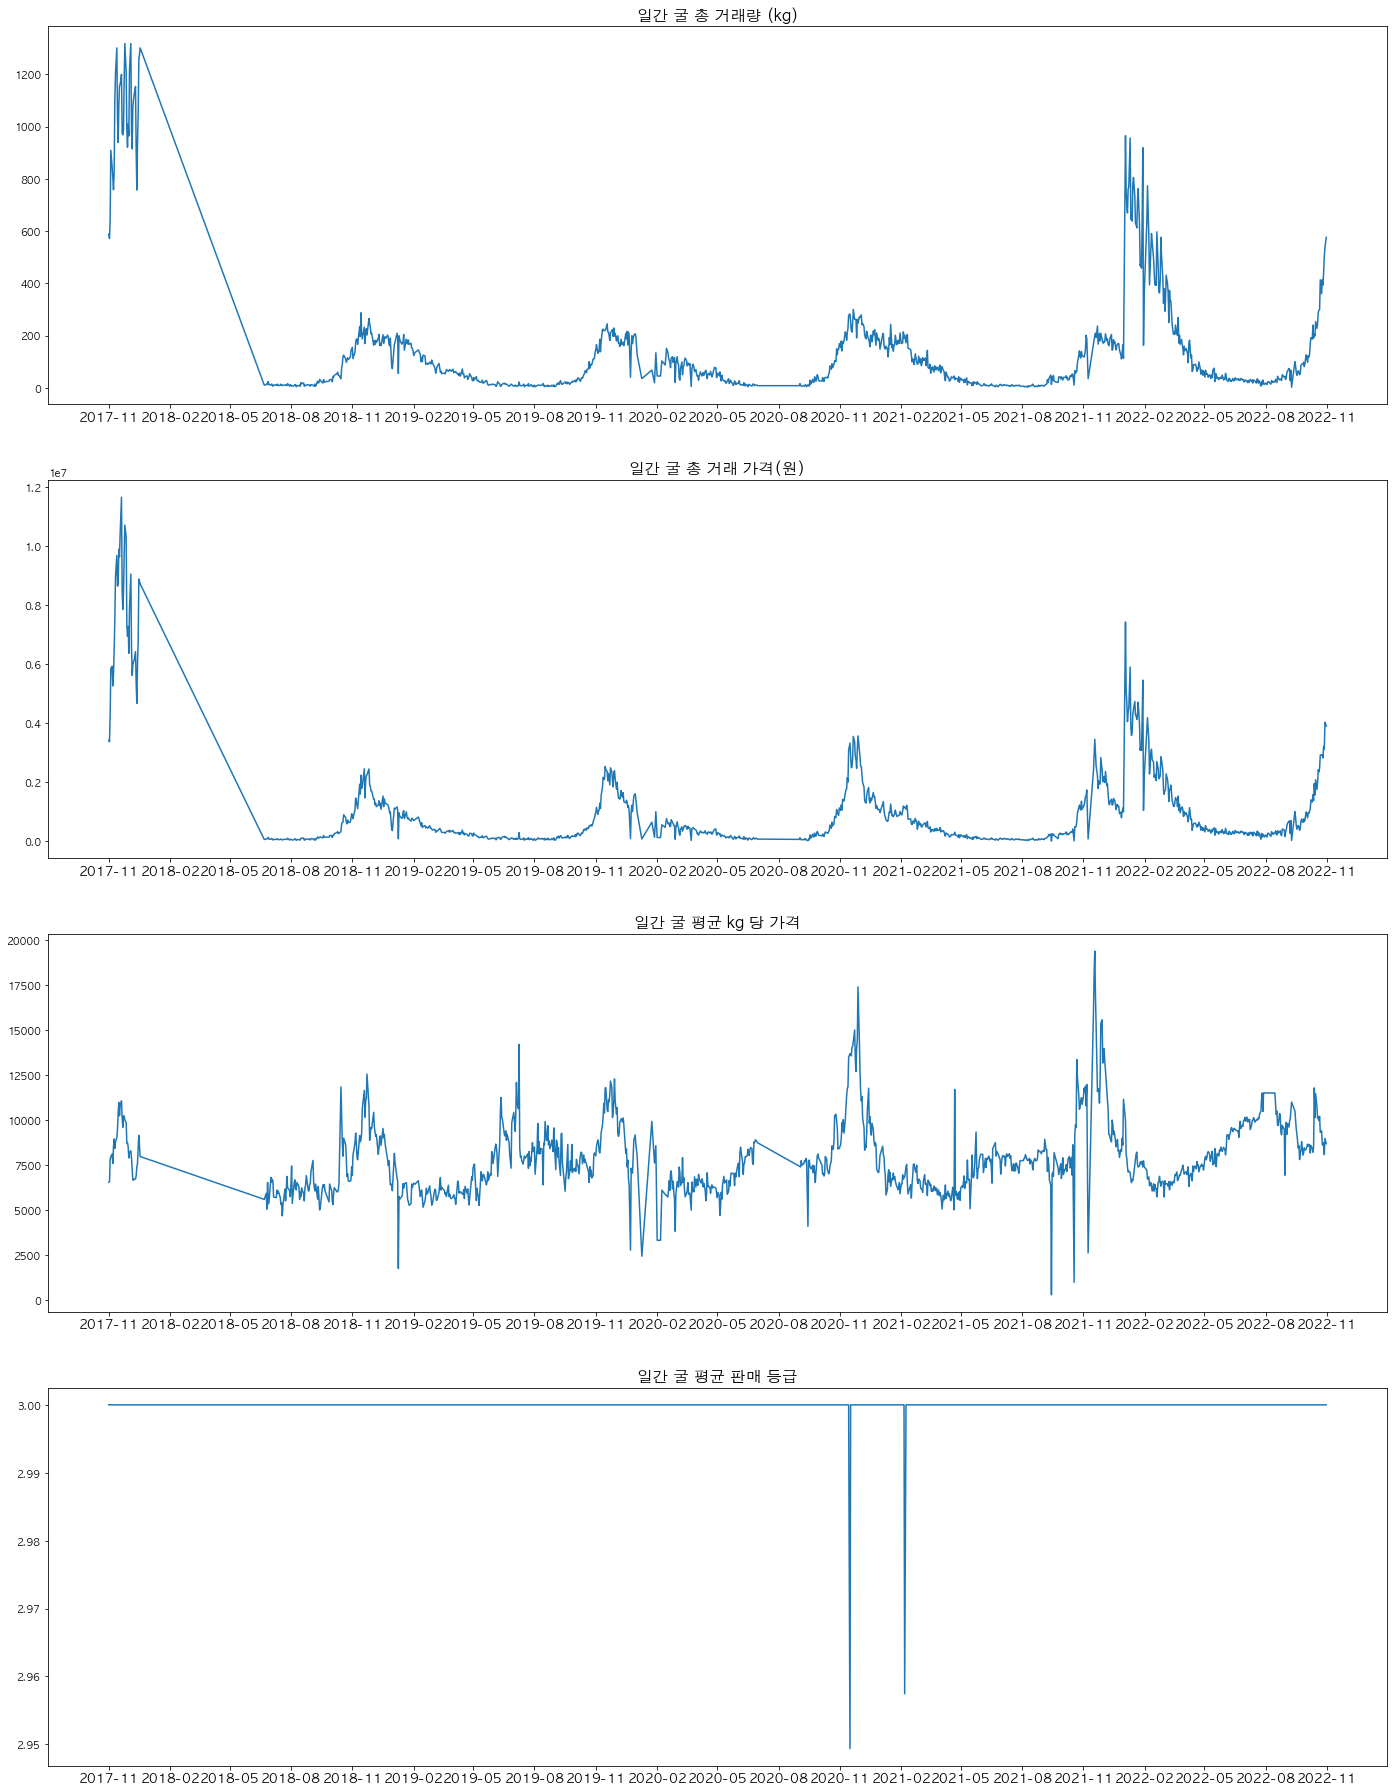

In [87]:
prd = '굴'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 마늘

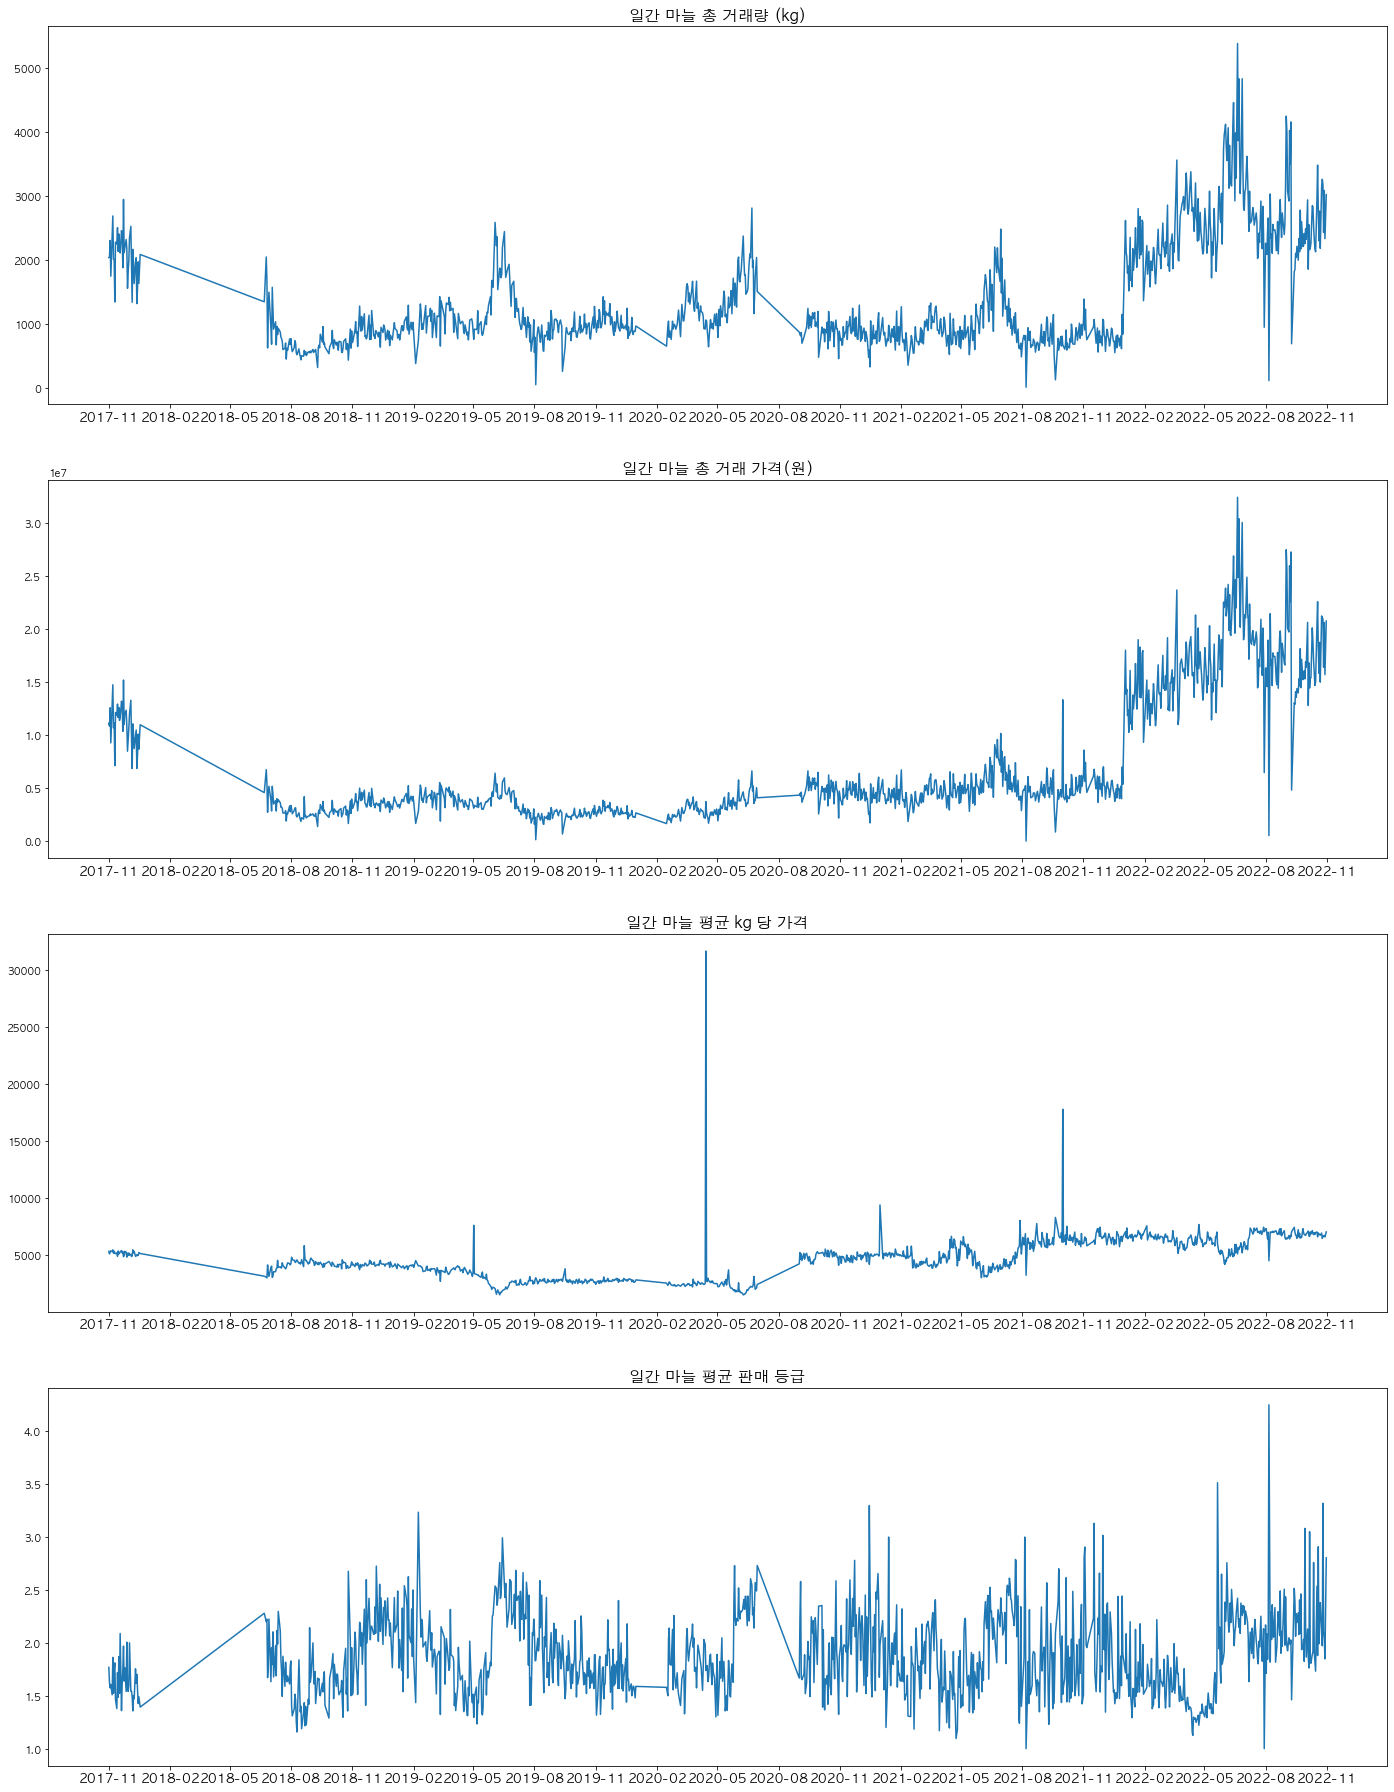

In [88]:
prd = '마늘'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 무

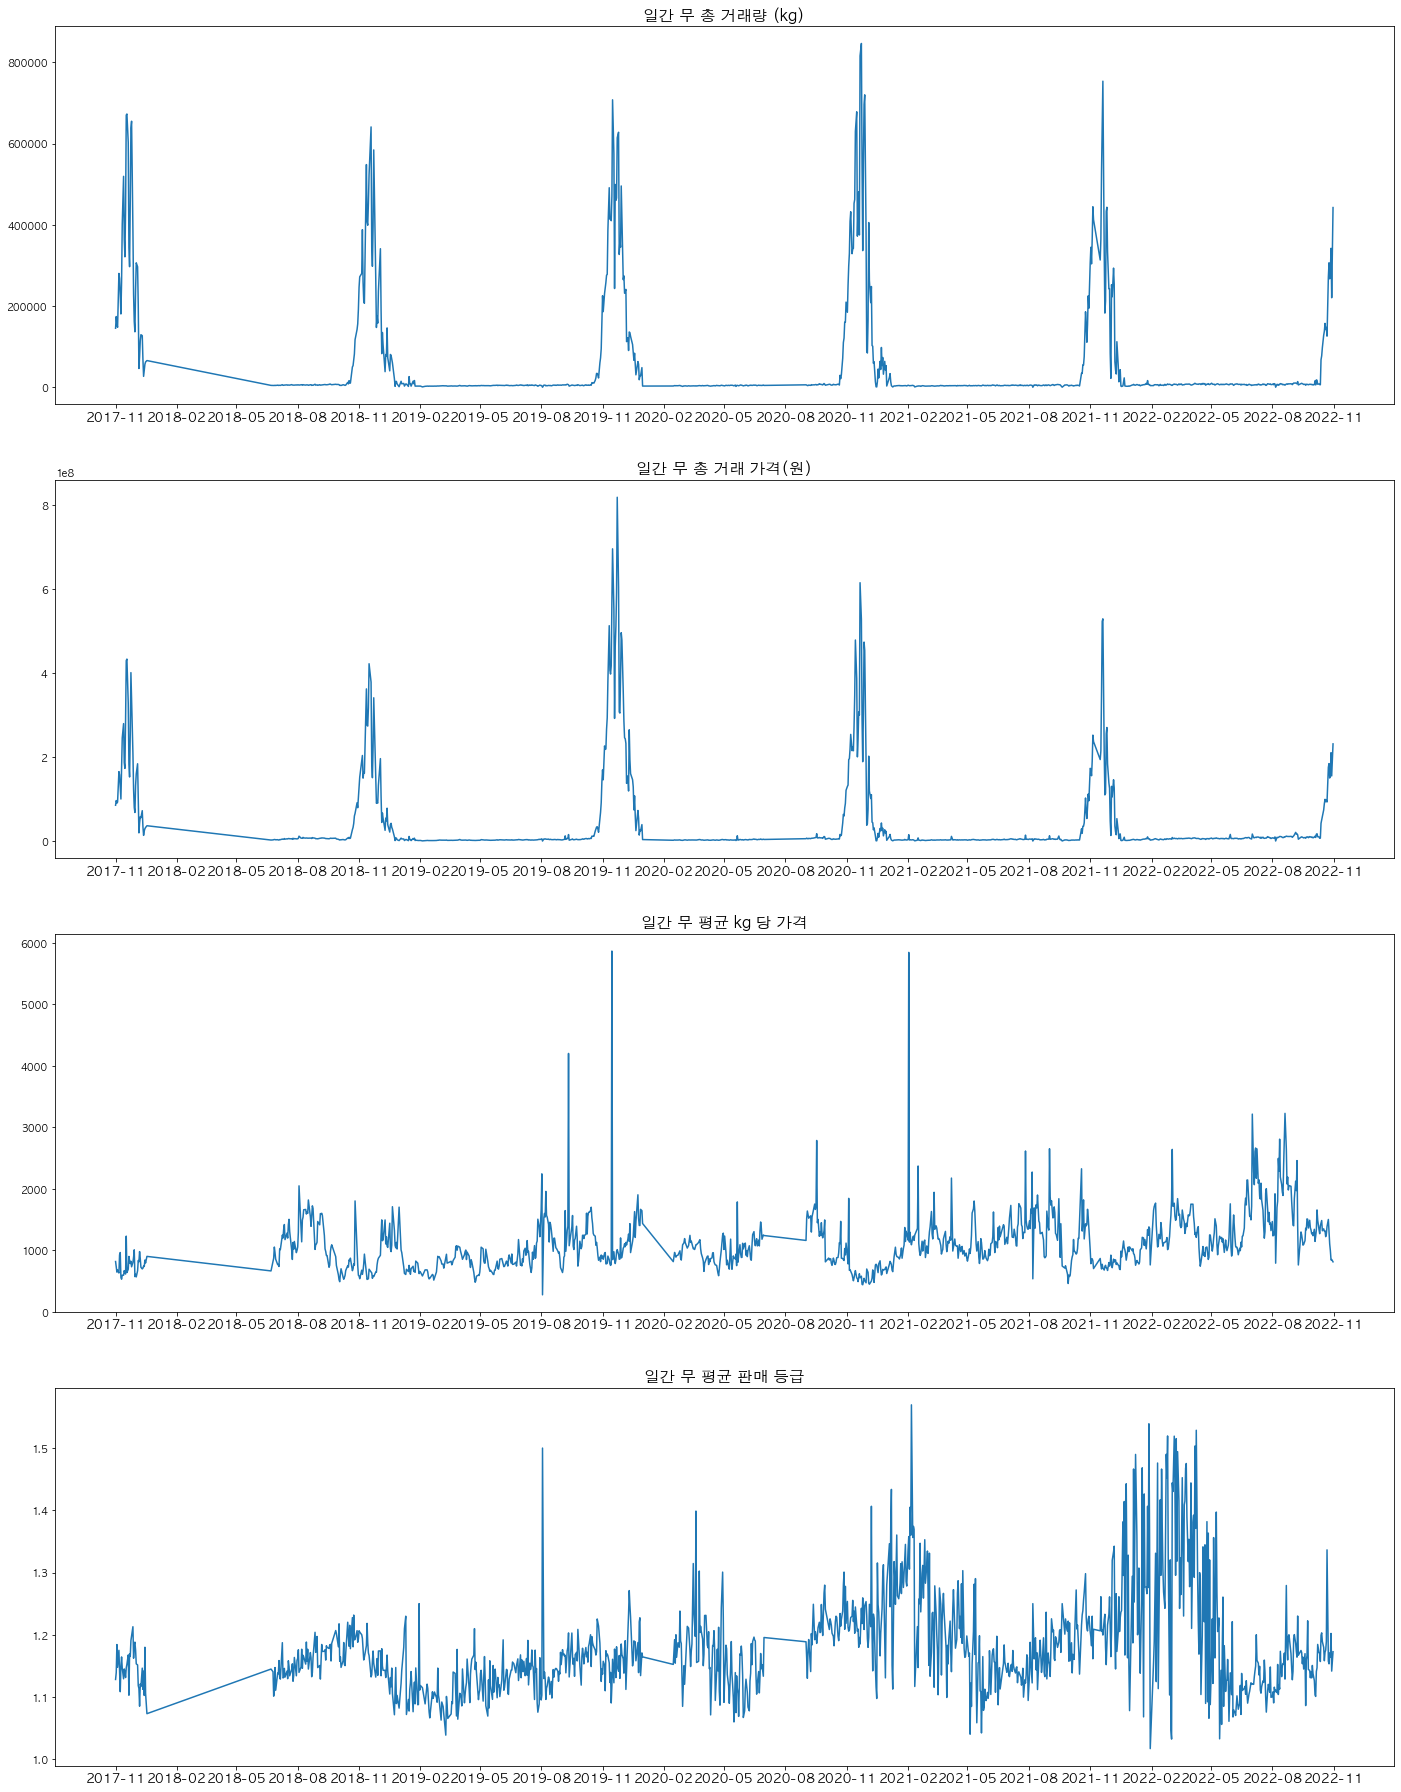

In [89]:
prd = '무'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 미나리

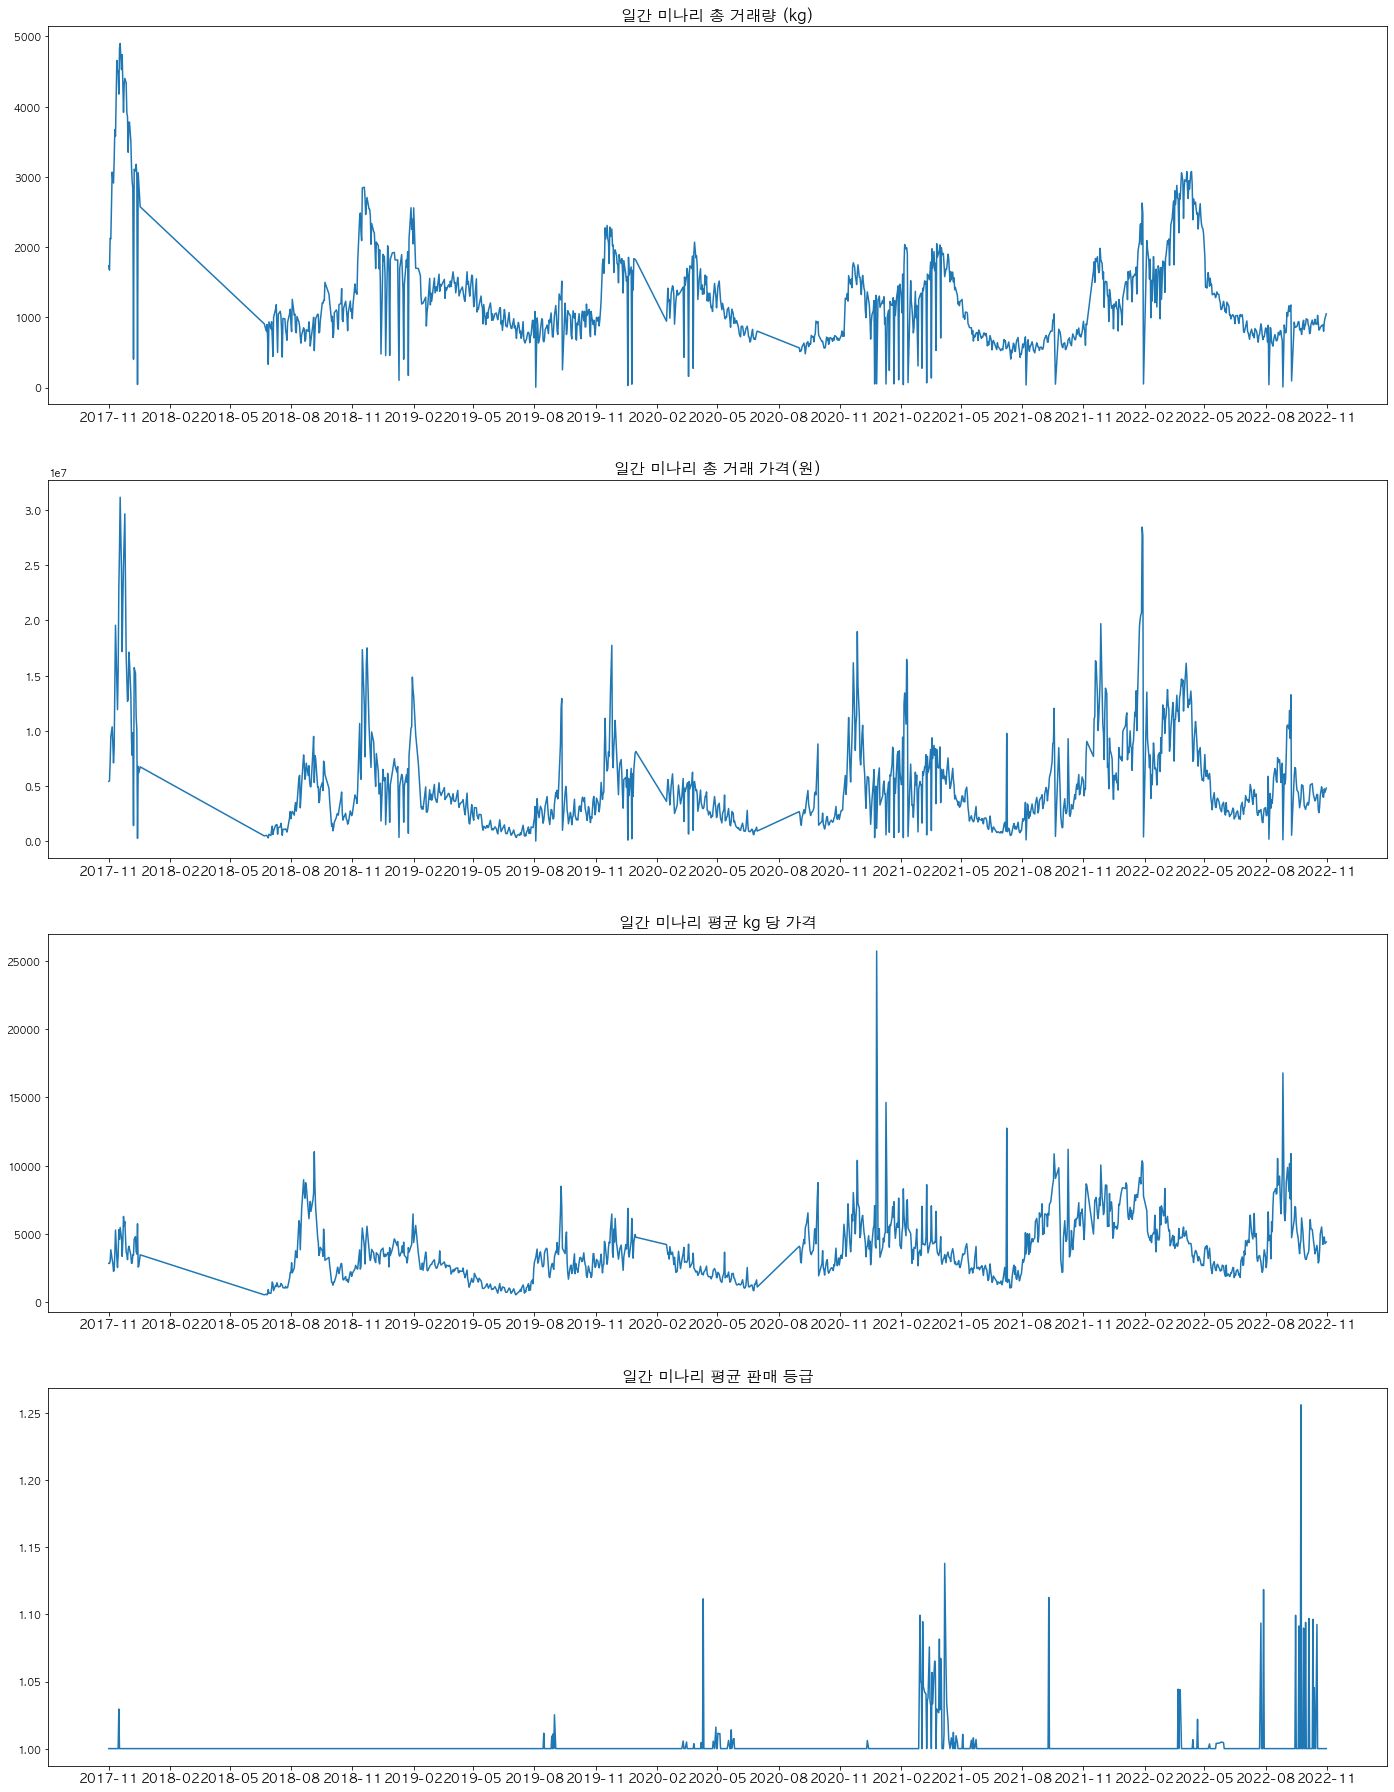

In [90]:
prd = '미나리'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 배

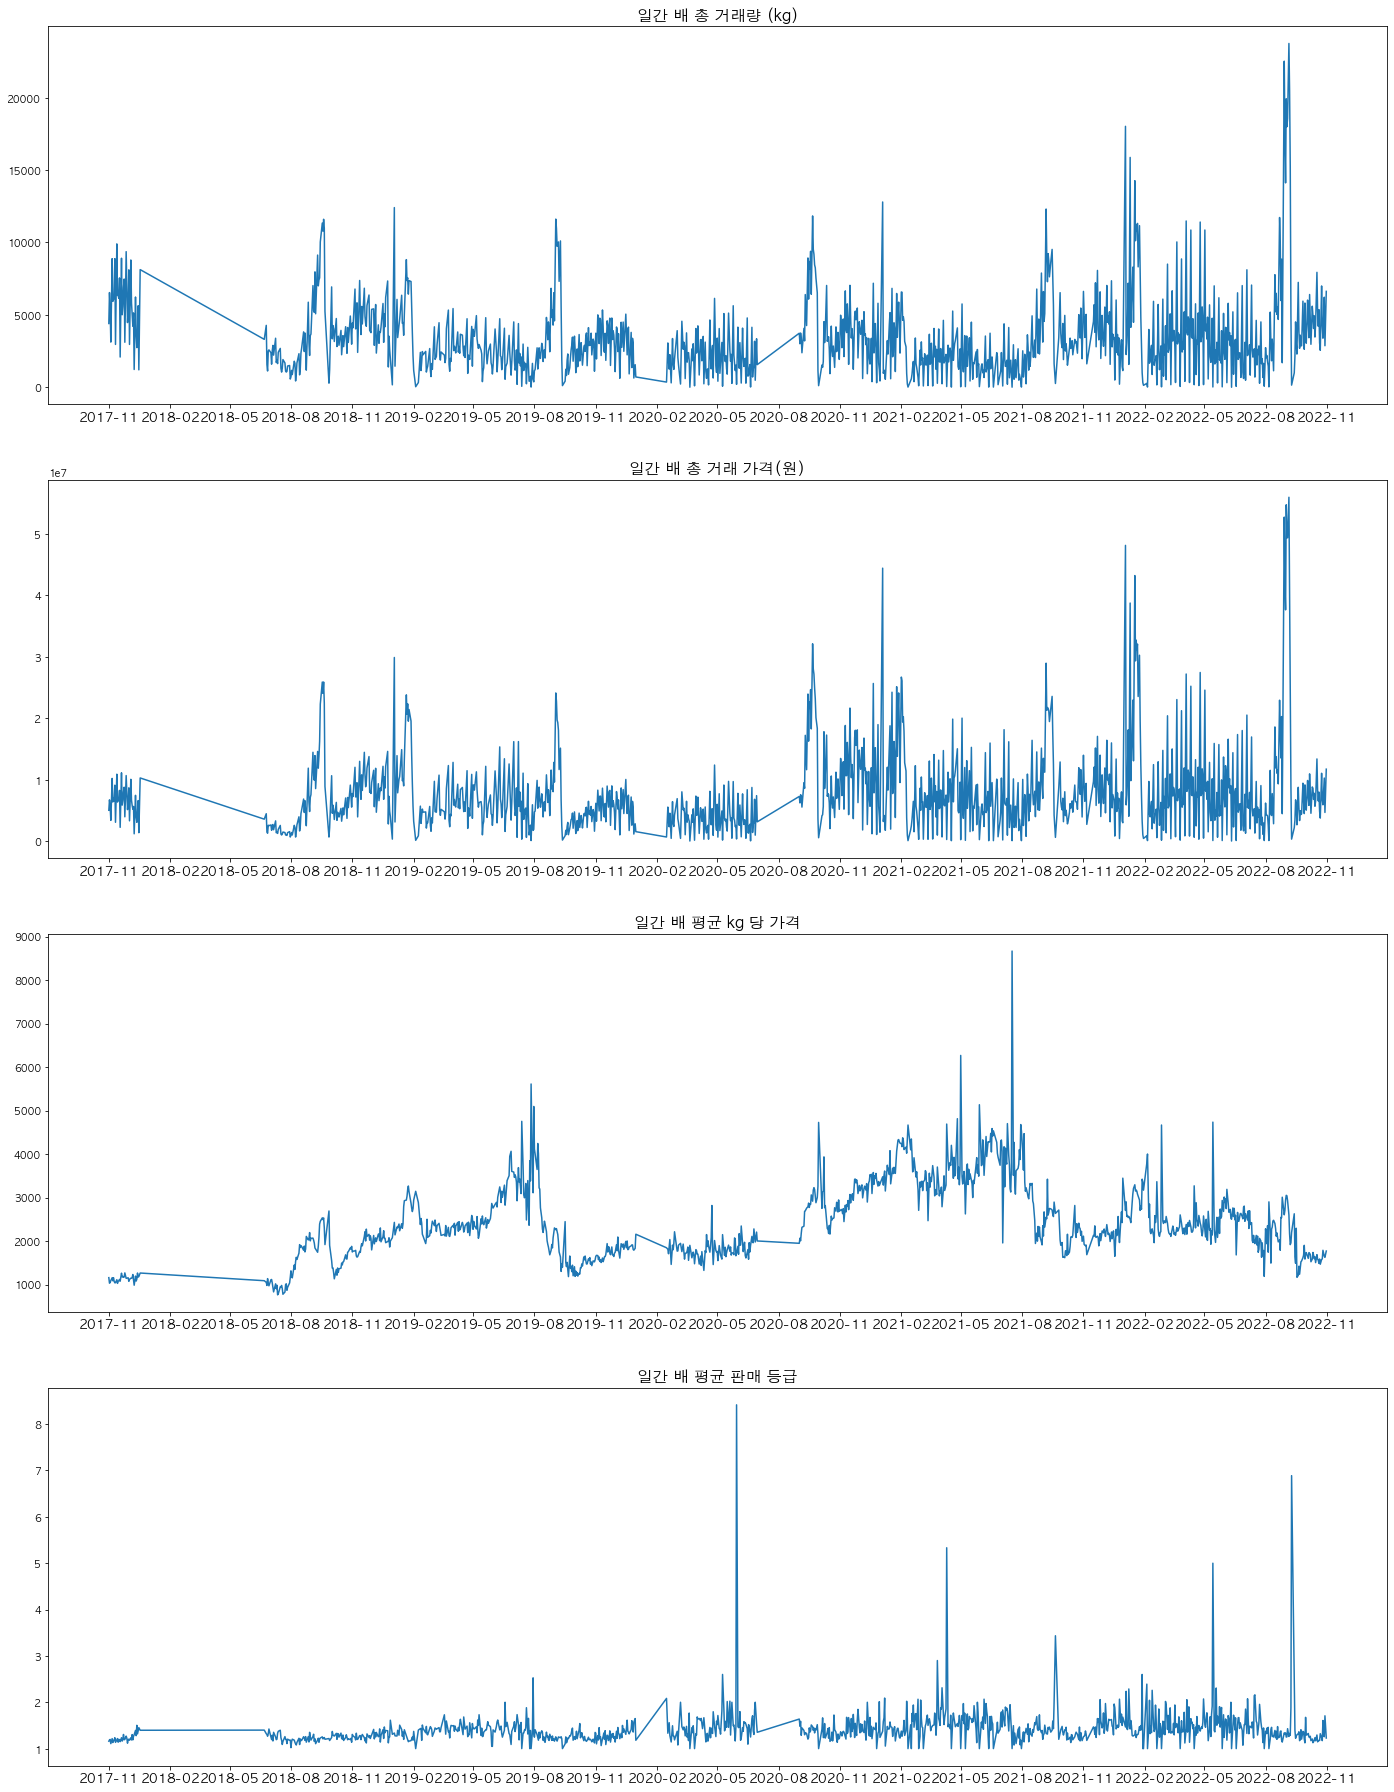

In [91]:
prd = '배'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 배추

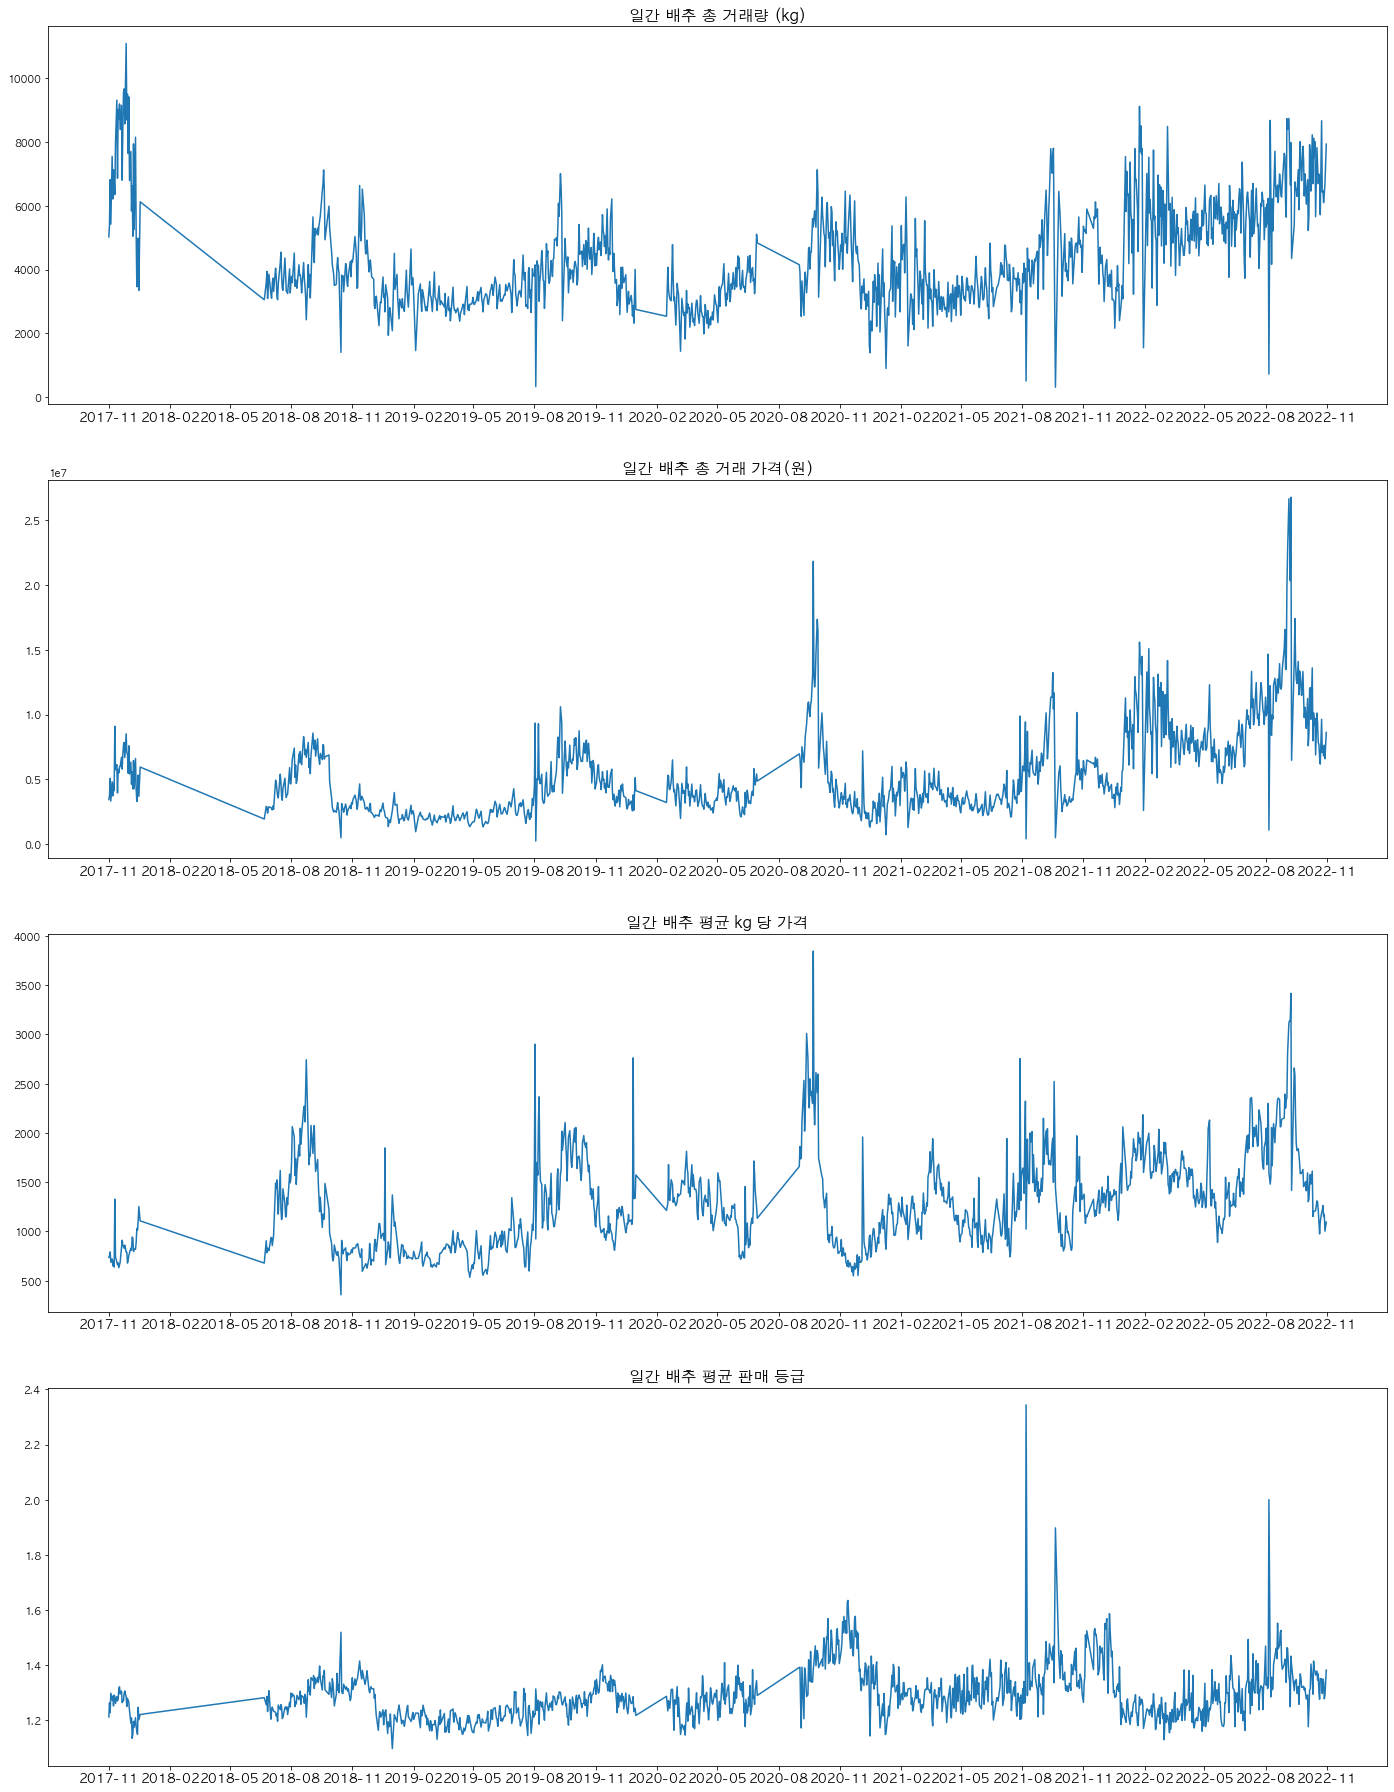

In [92]:
prd = '배추'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 사과

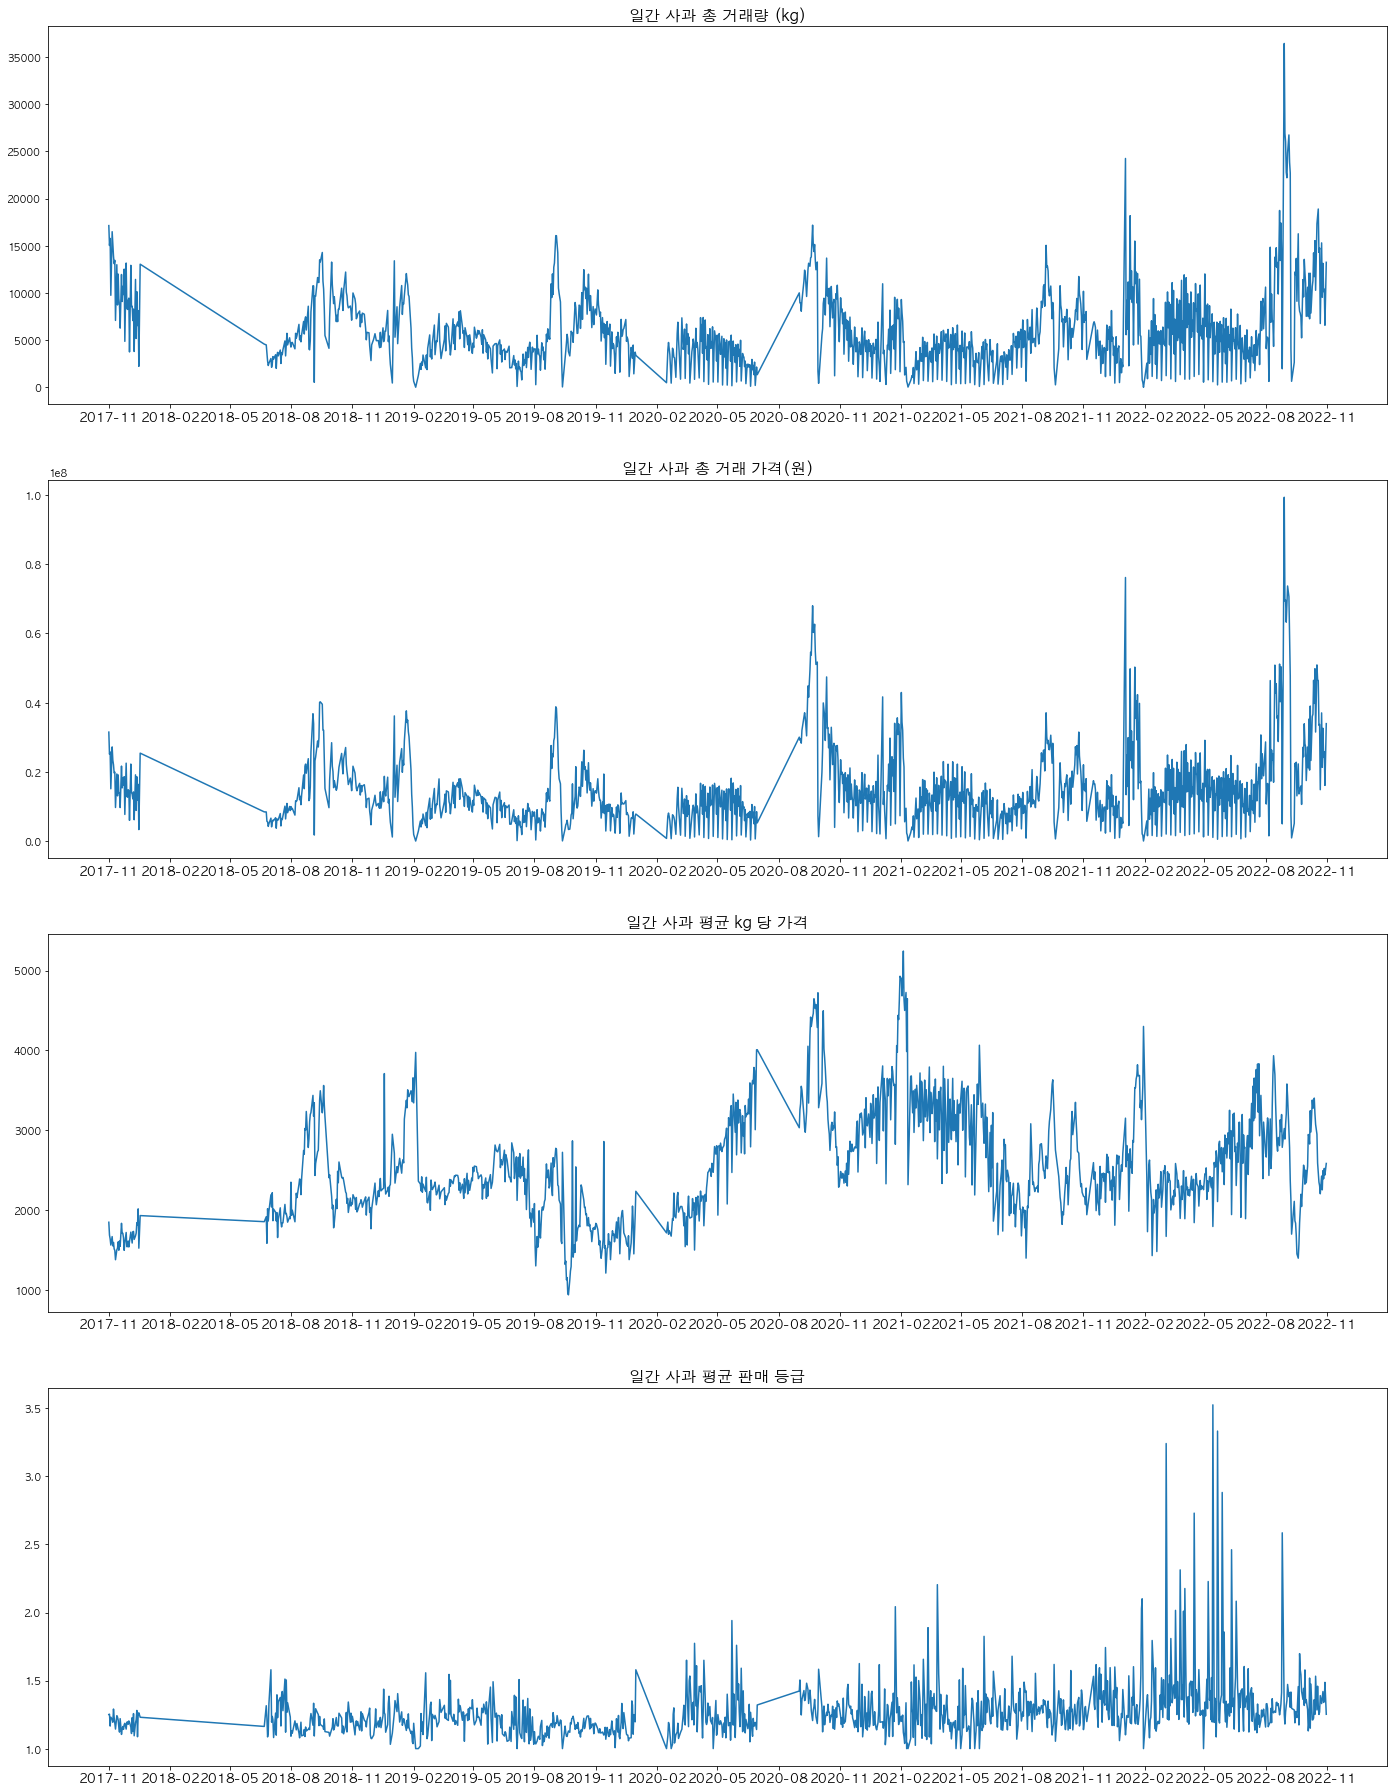

In [93]:
prd = '사과'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 생강

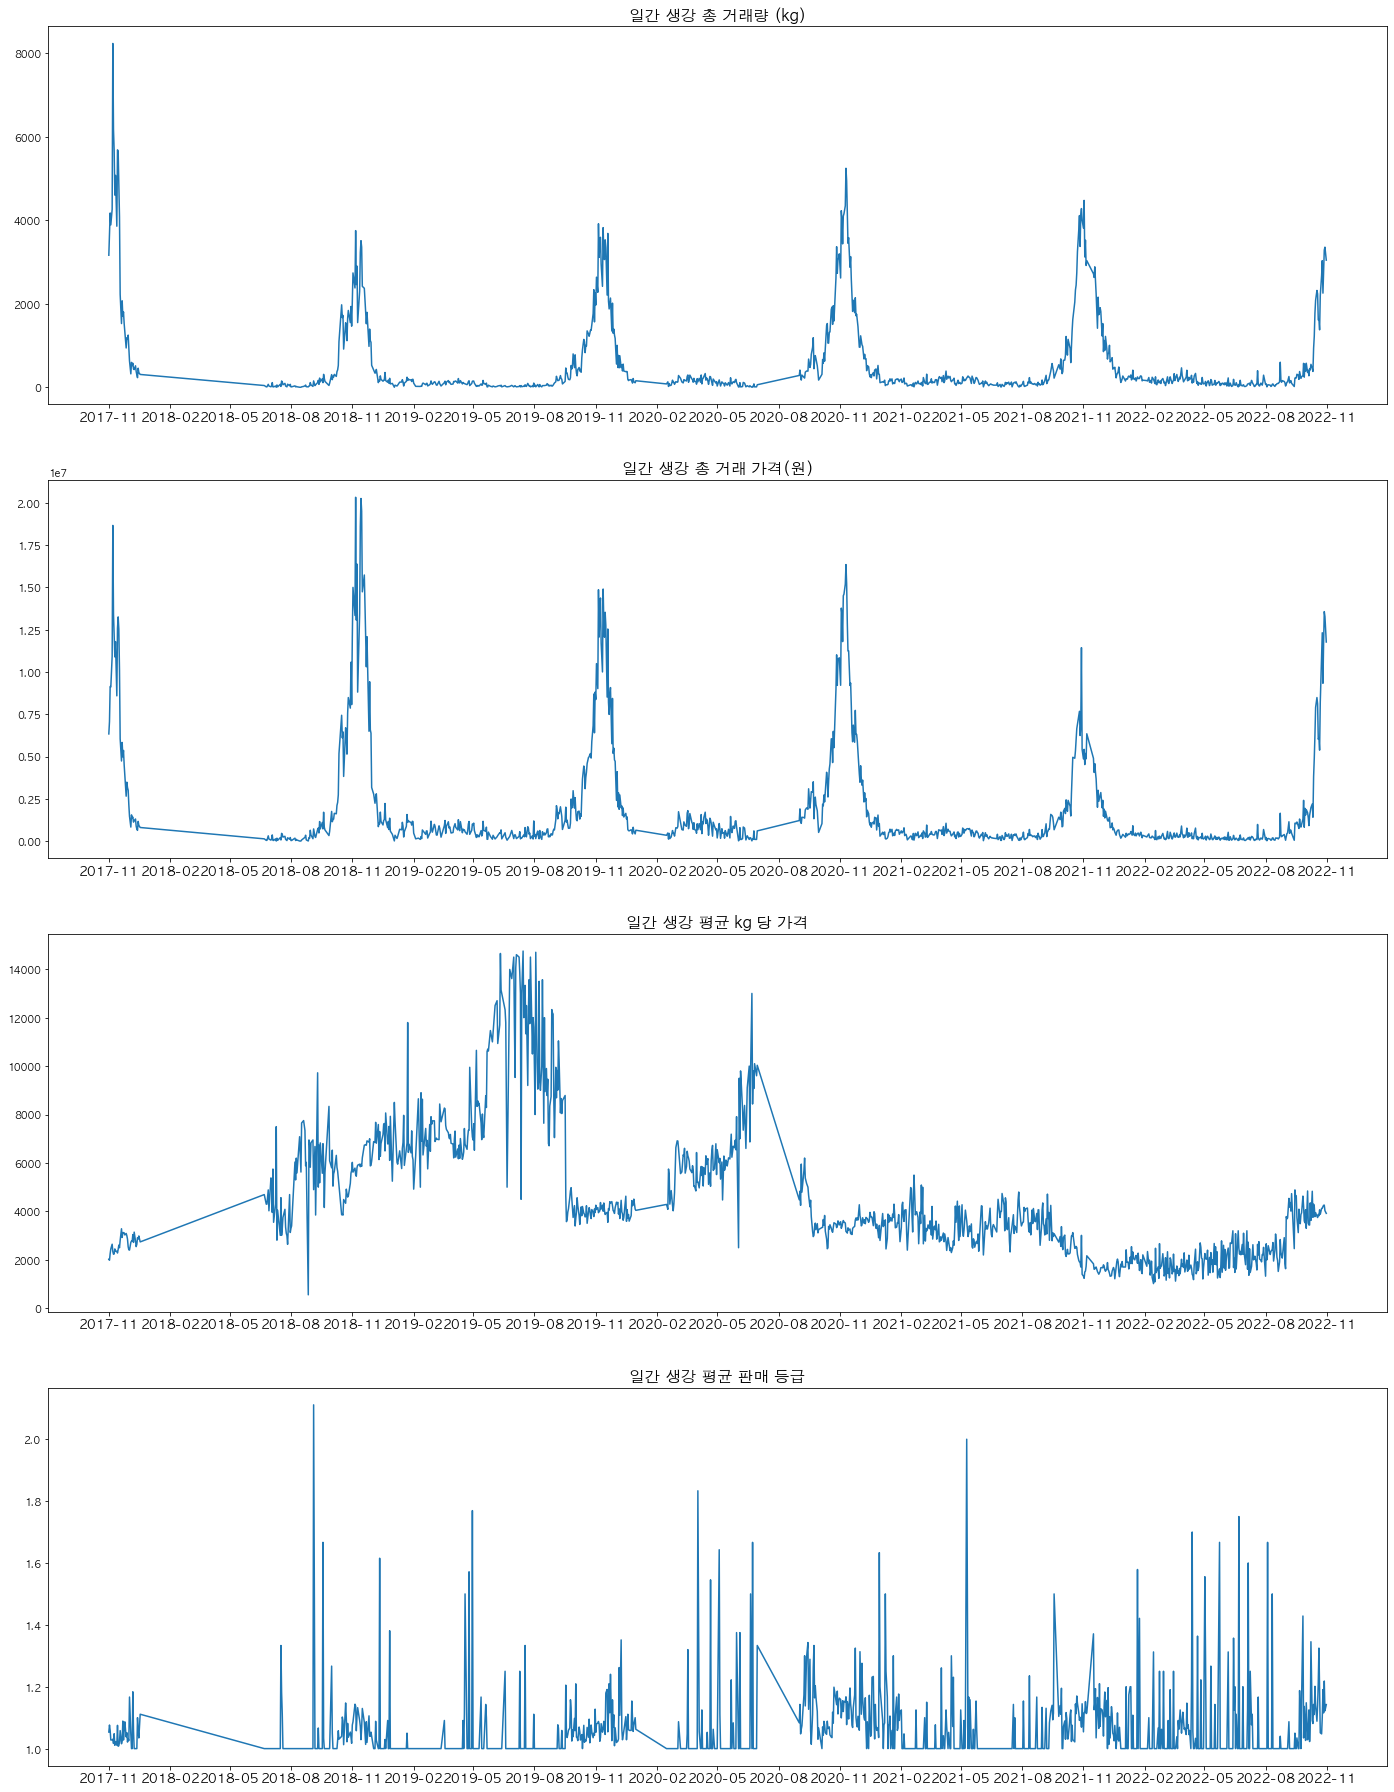

In [94]:
prd = '생강'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 양파

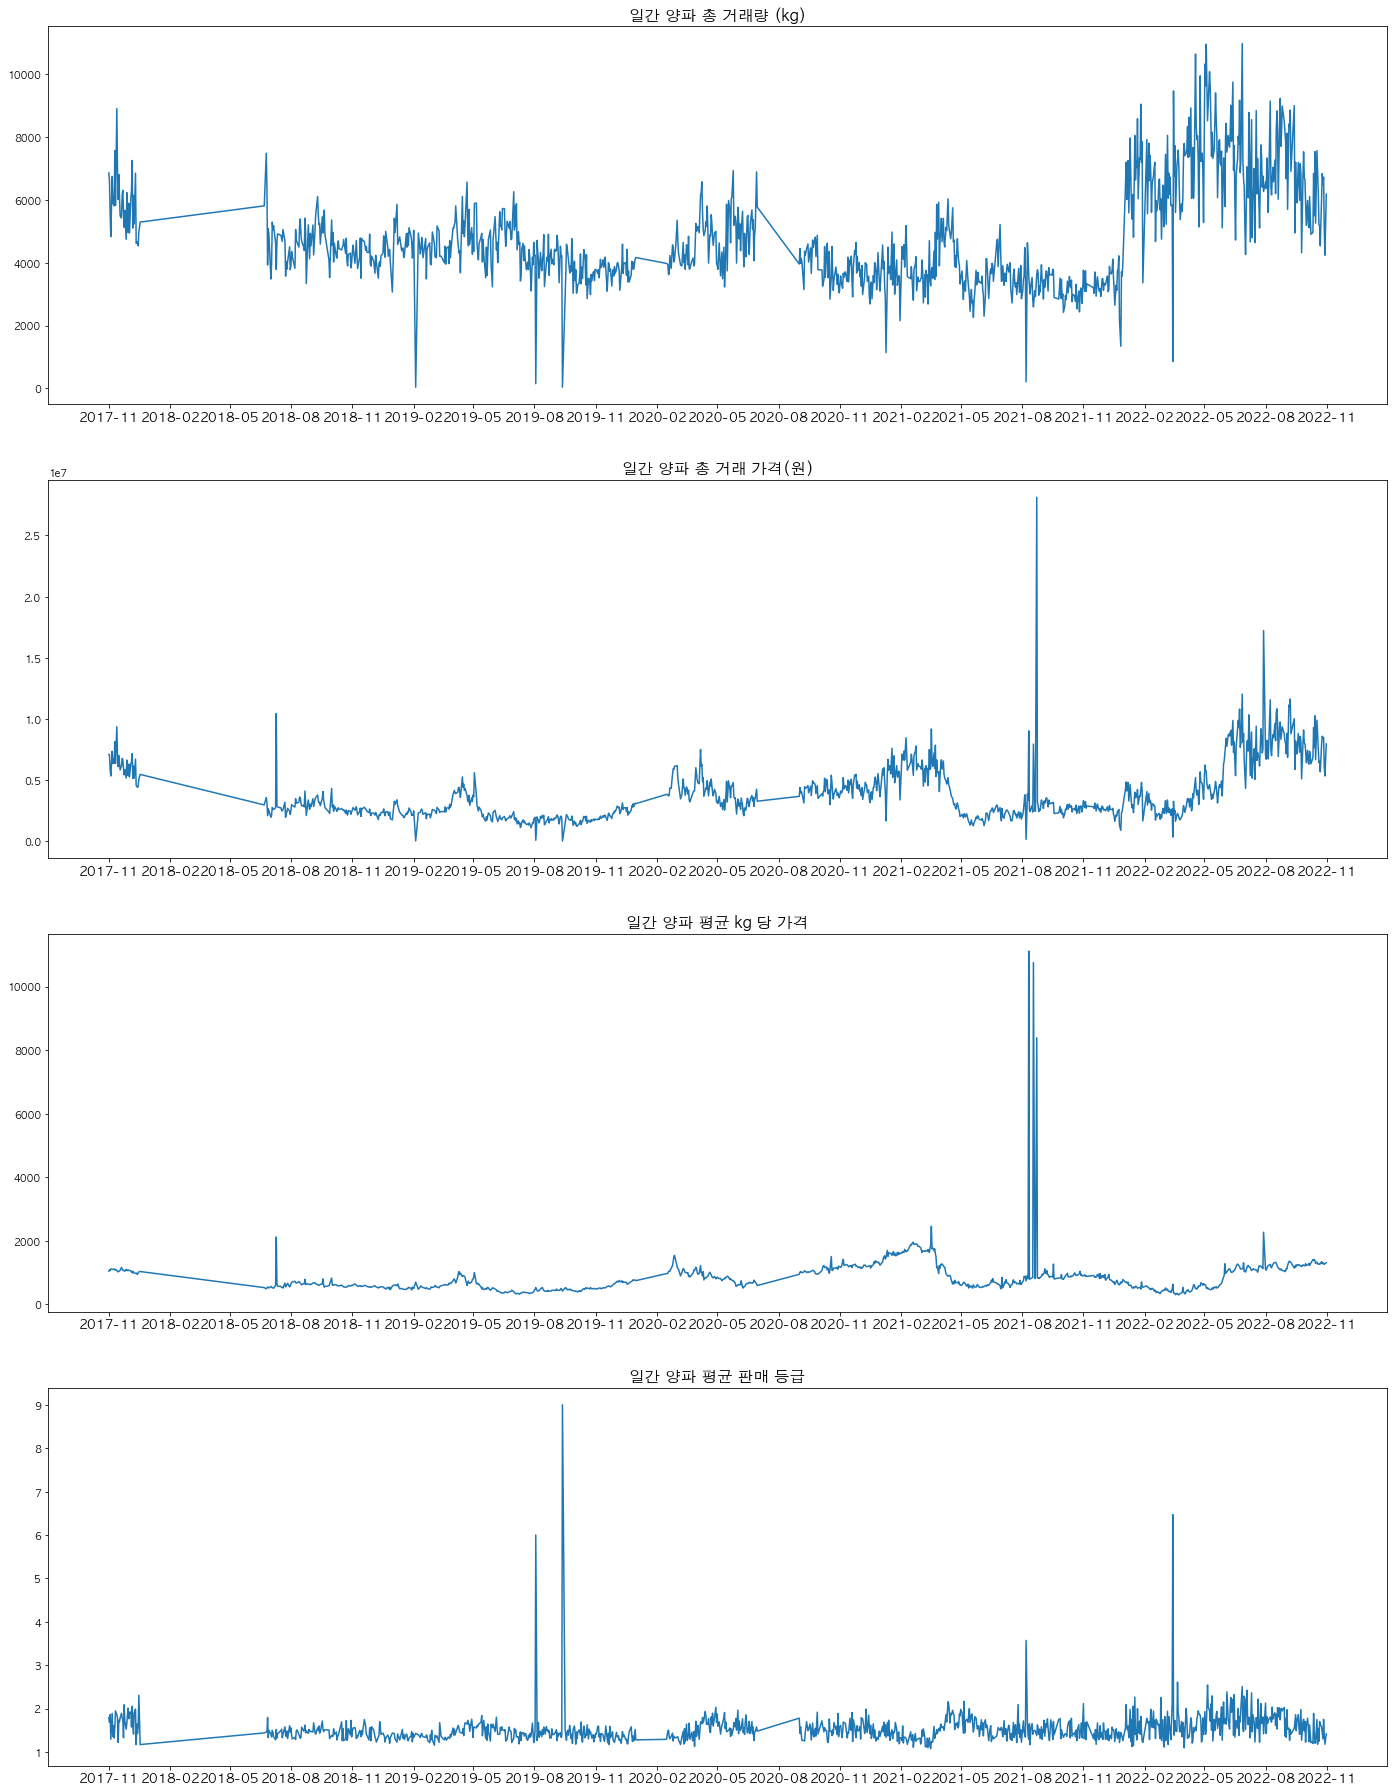

In [95]:
prd = '양파'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 열무

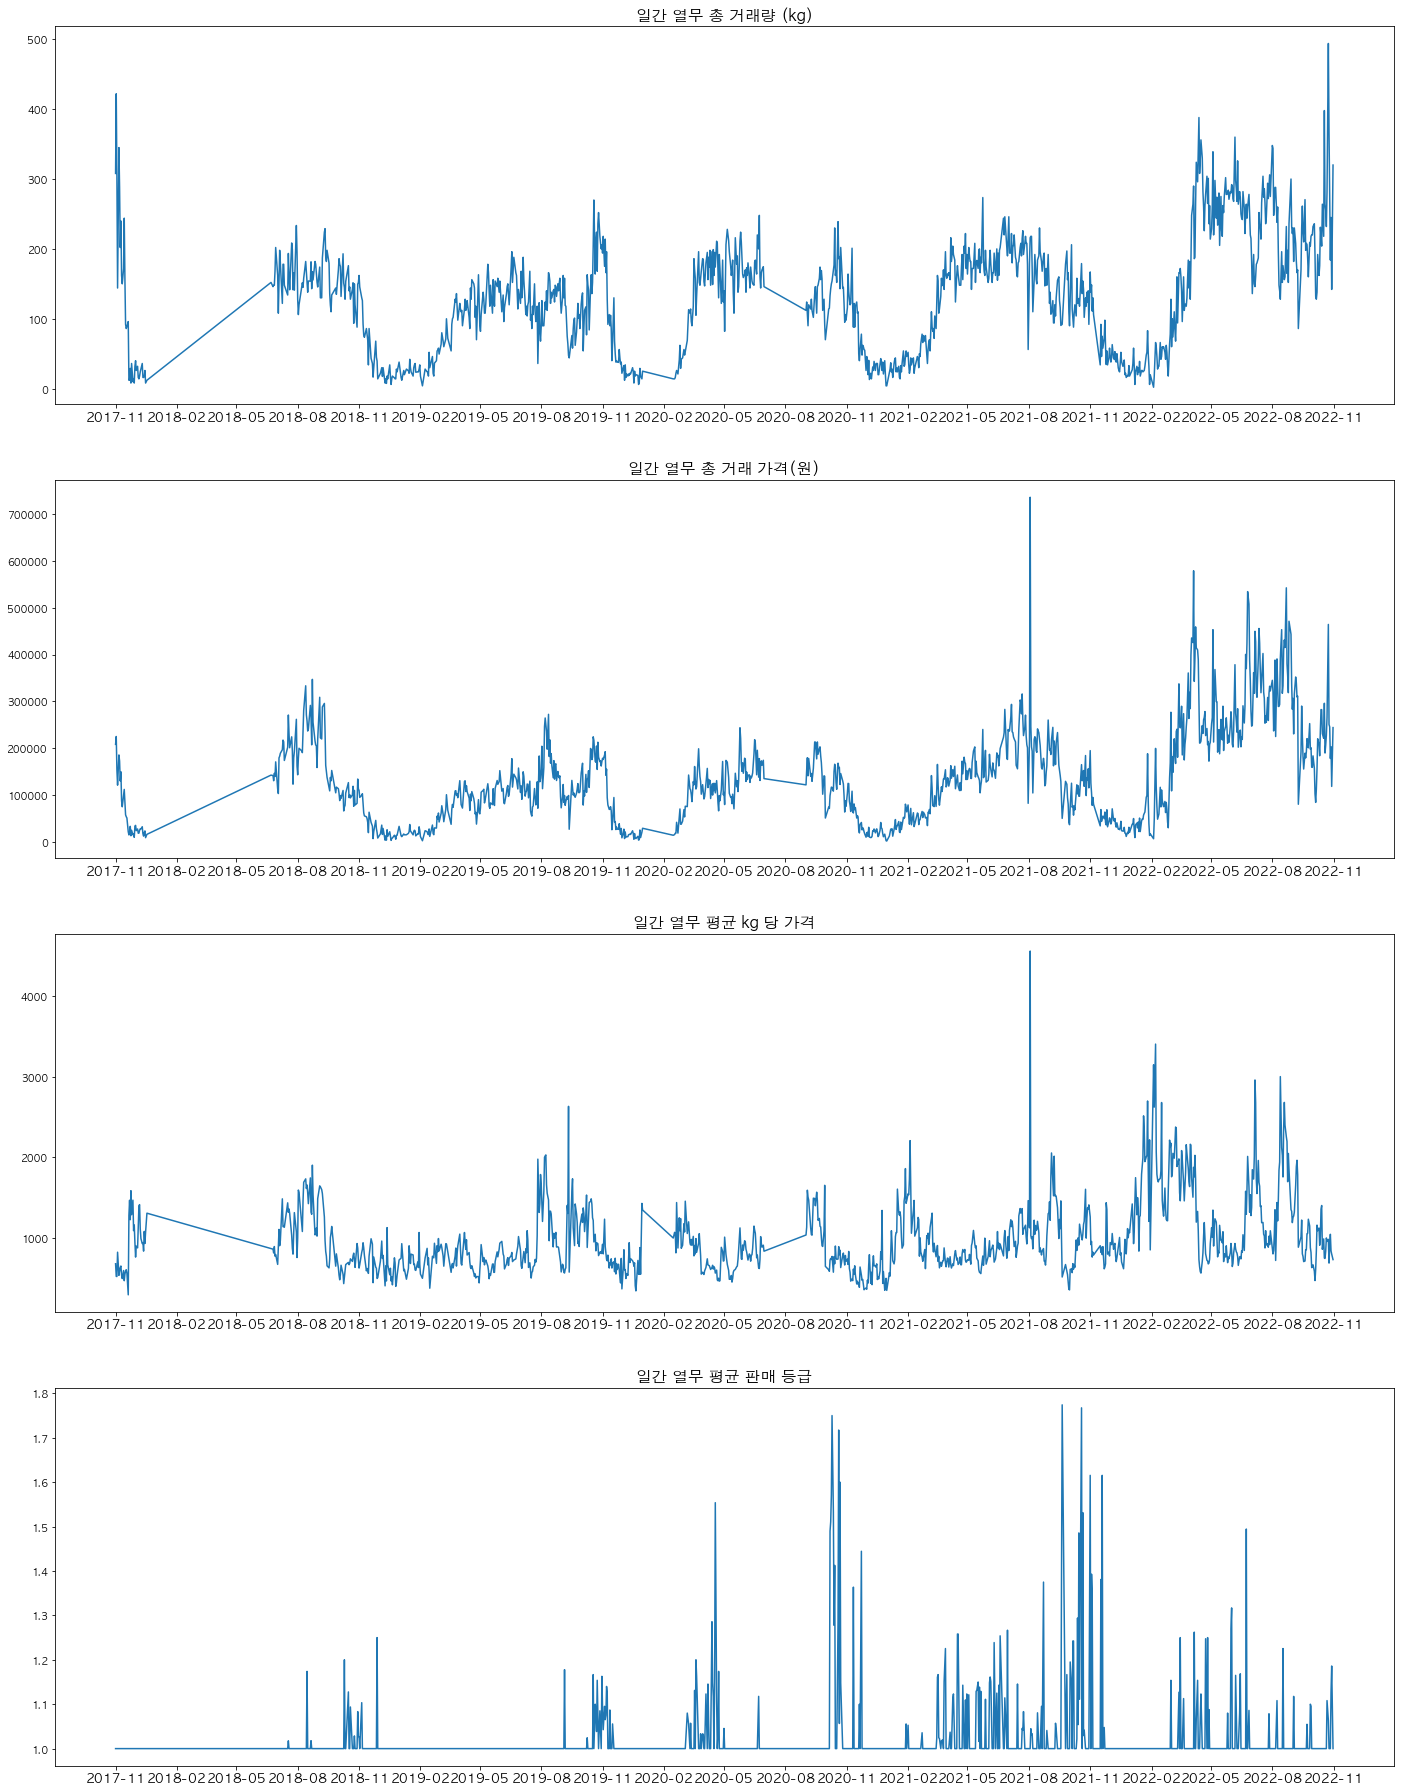

In [96]:
prd = '열무'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 쪽파

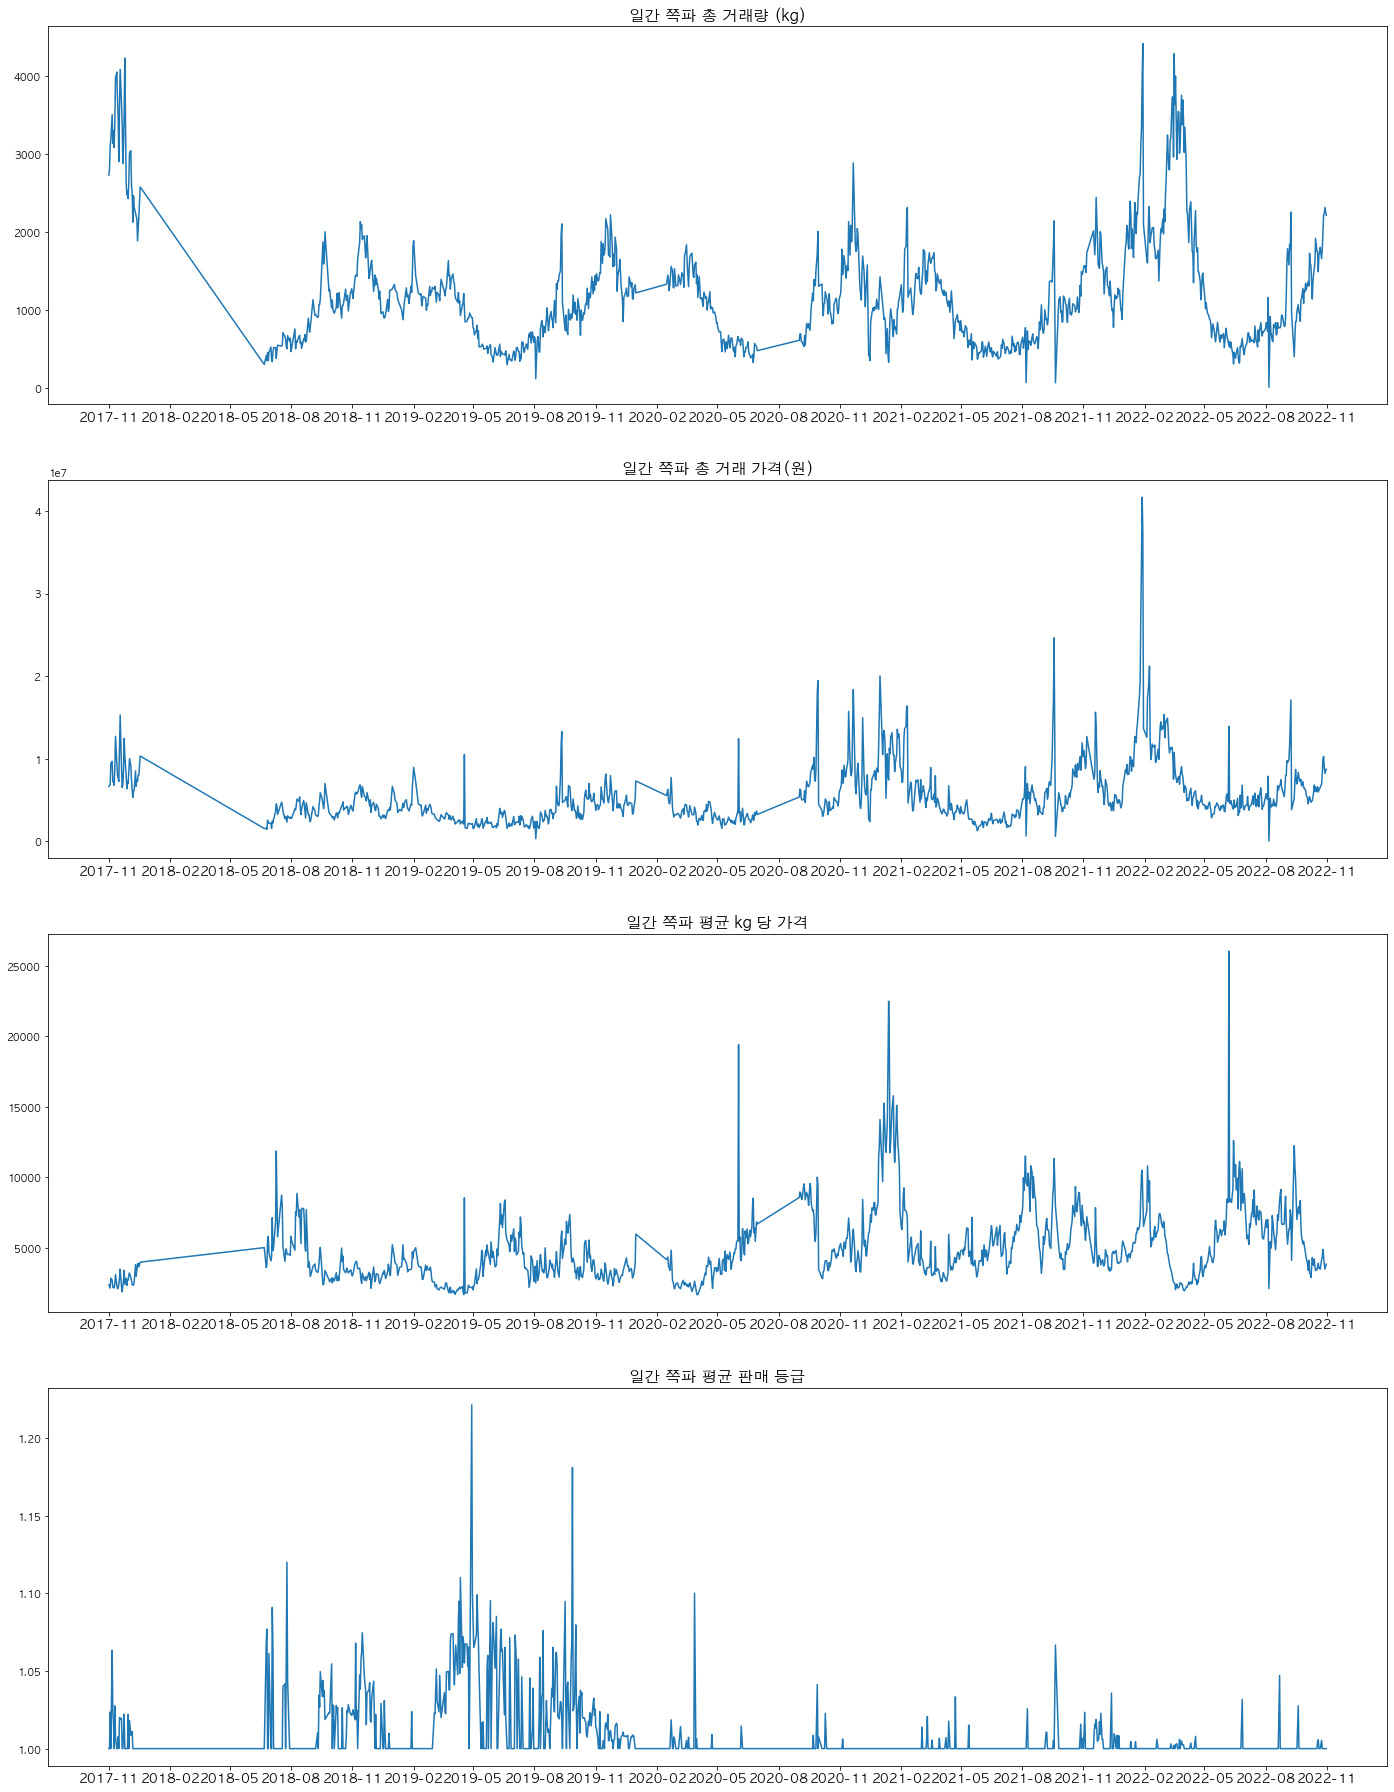

In [97]:
prd = '쪽파'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

## 총각무

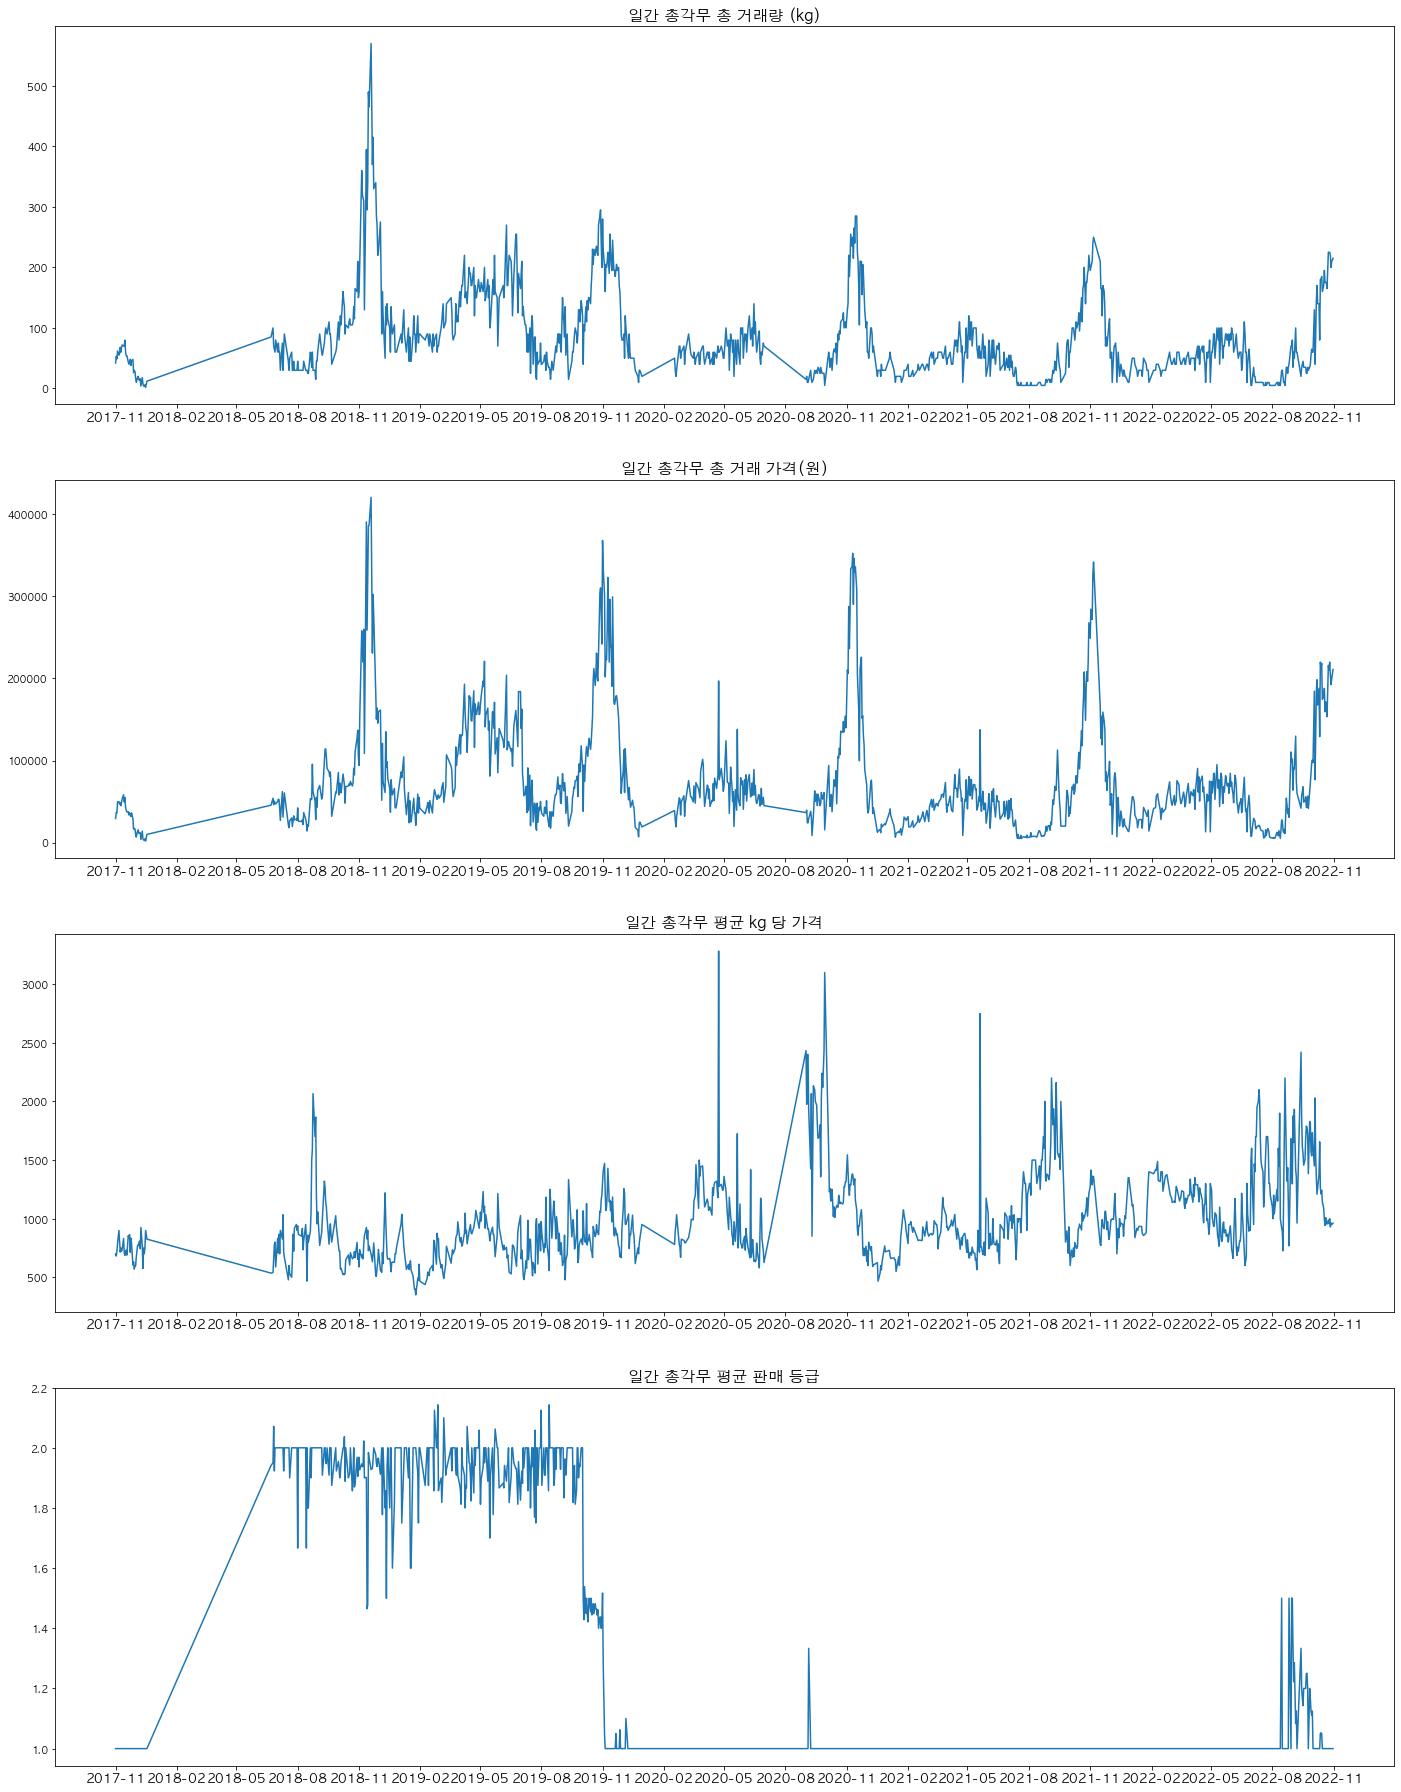

In [98]:
prd = '총각무'

a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})

plt.figure(figsize=(24,32),facecolor="white")
plt.subplot(4,1,1)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래량 (kg)')
aaa = plt.plot(c['reg_date'],c['total_scale'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))


plt.subplot(4,1,2)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 총 거래 가격(원)')
aaa = plt.plot(c['reg_date'],c['total_price'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,3)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 kg 당 가격')
aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.subplot(4,1,4)
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title('일간 '+prd+' 평균 판매 등급')
aaa = plt.plot(c['reg_date'],c['avg_class'])
ax = plt.gca()
ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

plt.show()

# 월별 비교

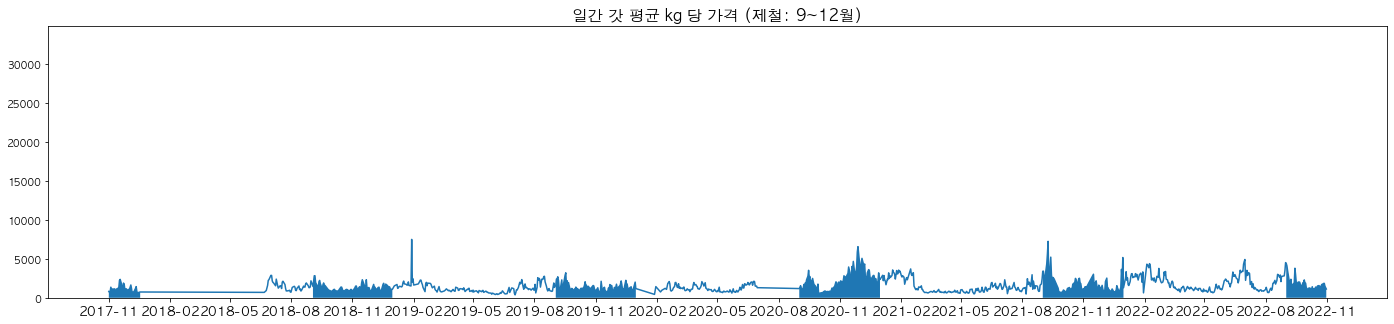

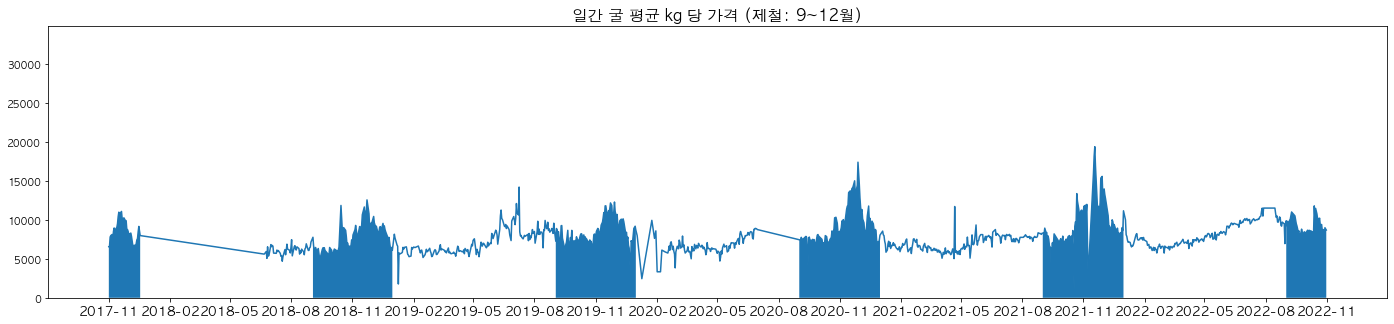

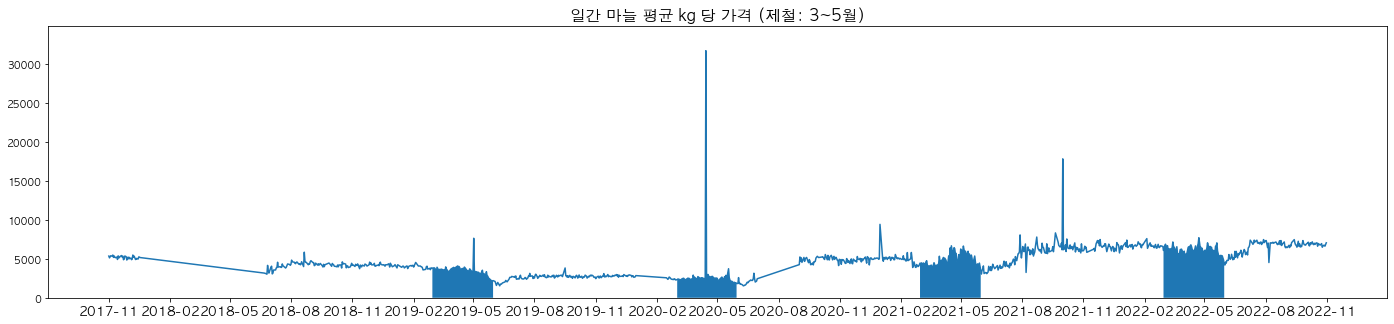

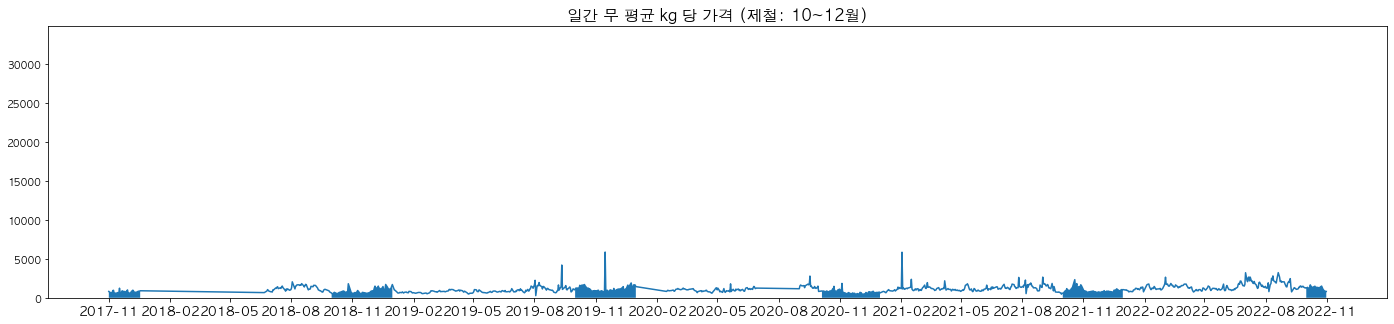

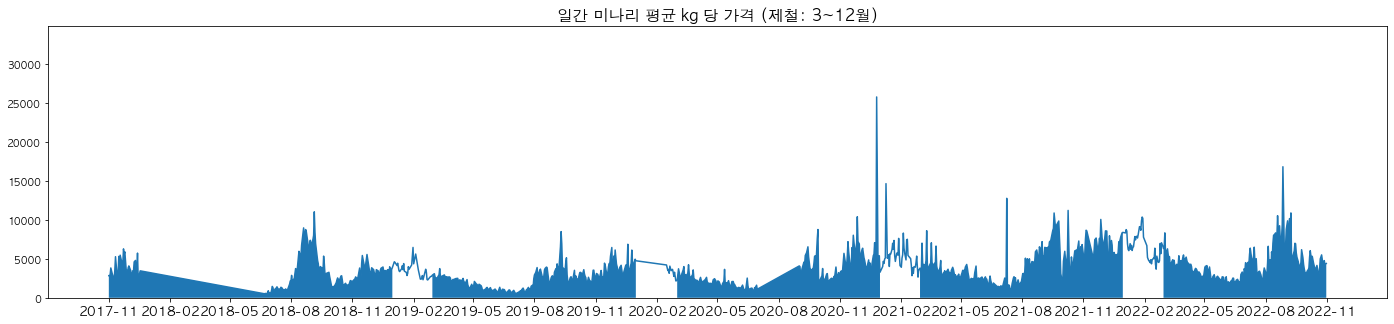

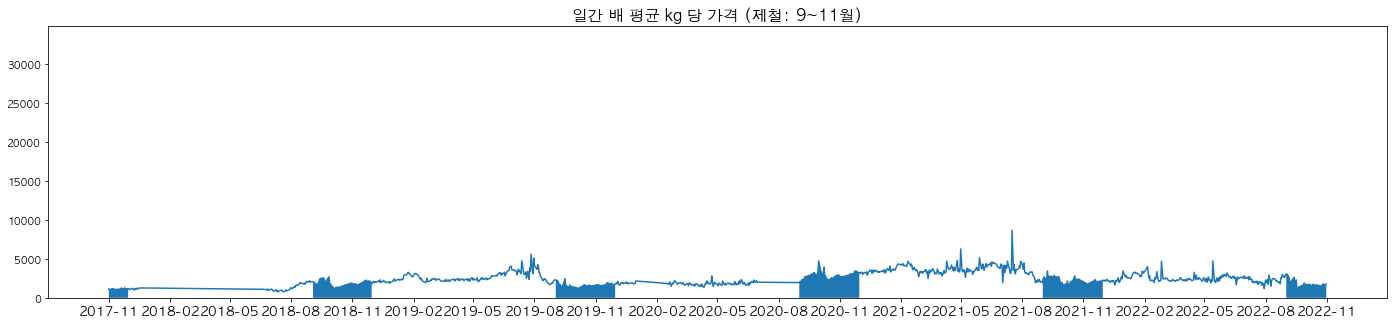

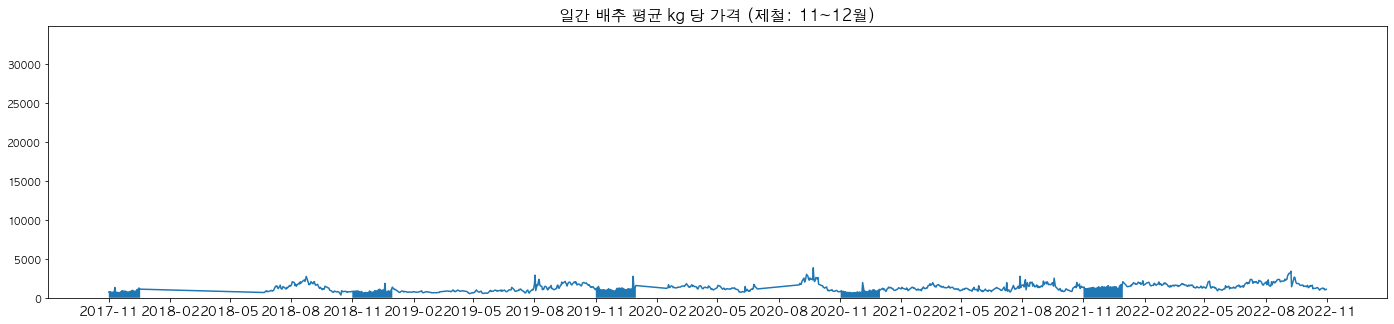

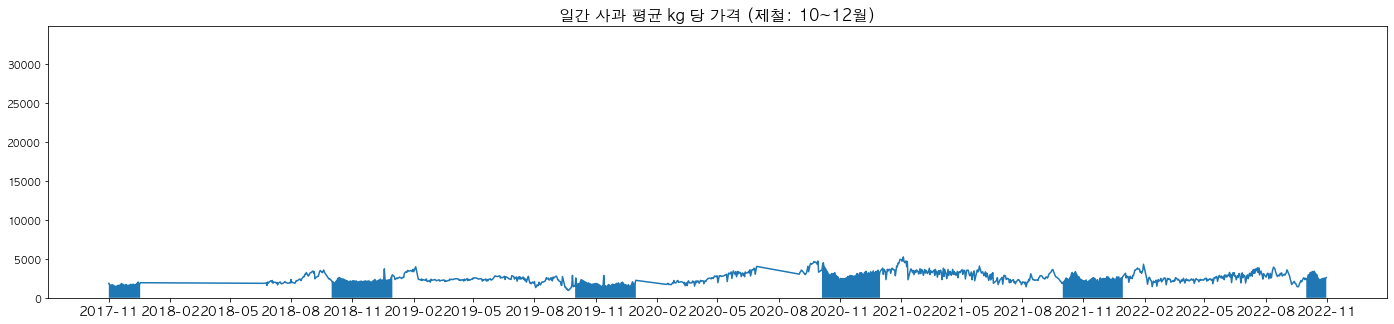

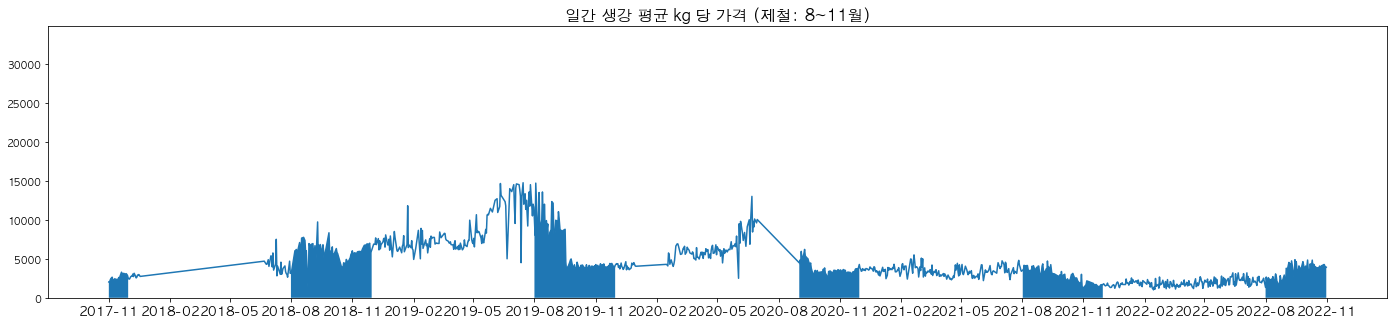

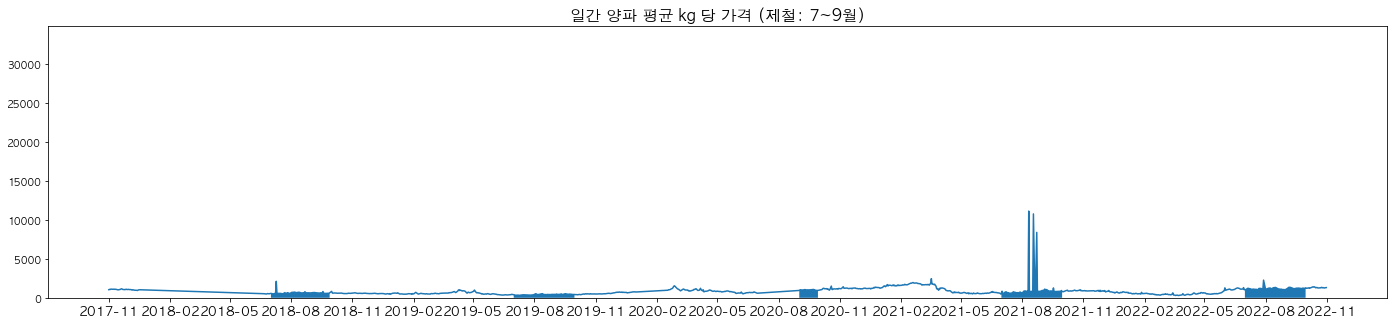

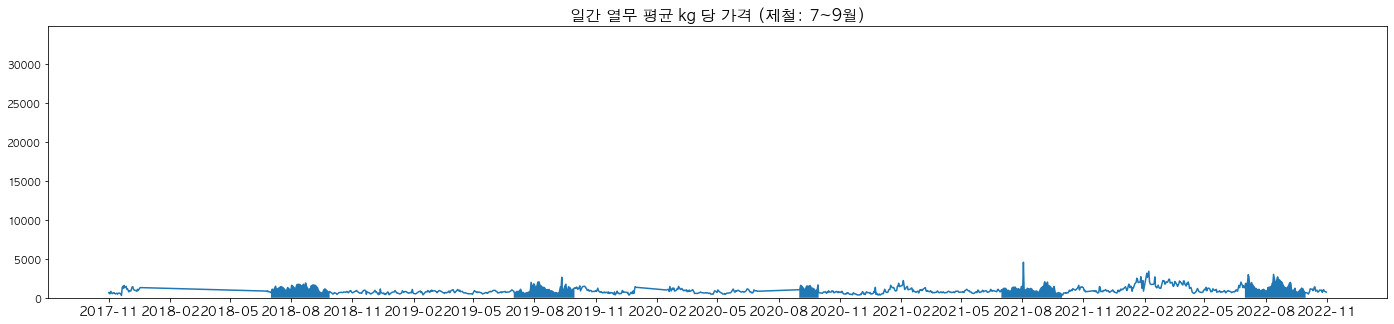

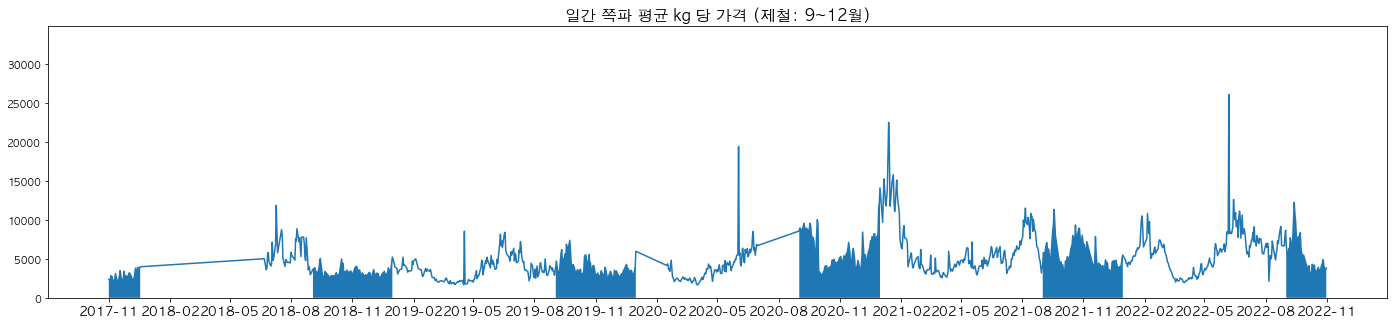

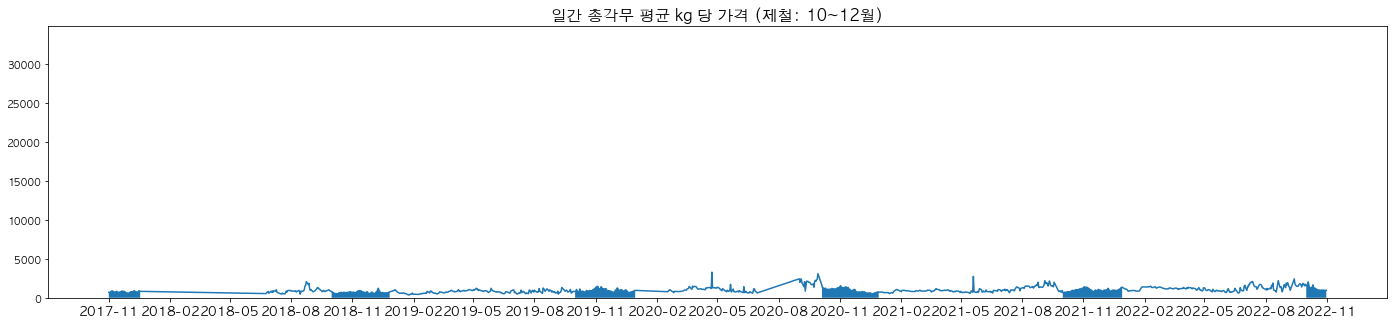

In [124]:
# avg pre
a = df.groupby(['prd','reg_date']).sum().reset_index()[['prd','reg_date','scale','price']]
b = df.groupby(['prd','reg_date']).mean().reset_index()[['prd','reg_date','new_class','price_kg']]
c = a.merge(b)
c = c.rename(columns= {'scale':'total_scale','price':'total_price','new_class':'avg_class','price_kg':'avg_price_kg'})
c
prd_lst = list(c['prd'].unique())
nums = [[9,12],[9,12],[3,5],[10,12],[3,12],[9,11],[11,12],[10,12],[8,11],[7,9],[7,9],[9,12],[10,12]]
cnt = 0

for prd in prd_lst:
    plt.figure(figsize=(24,5),facecolor="white")
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 kg 당 가격 (제철: {nums[cnt][0]}~{nums[cnt][1]}월)')
    aaa = plt.plot(c[c['prd']==prd]['reg_date'],c[c['prd']==prd]['avg_price_kg'])
    plt.fill_between(c[c['prd']==prd]['reg_date'],c[c['prd']==prd]['avg_price_kg'],where=(c[c['prd']==prd]['reg_date'].dt.month>=nums[cnt][0]) & (c[c['prd']==prd]['reg_date'].dt.month<=nums[cnt][1]))
    ax = plt.gca()
    current_values = plt.gca().get_yticks()
    plt.ylim(0,max(c['avg_price_kg'])*1.1)
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))
    cnt += 1